<a href="https://colab.research.google.com/github/Dev-hottae/PINC/blob/master/Mirae_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Drive Mount

# from google.colab import drive
# drive.mount("/content/drive")

In [186]:
# Package

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta
from datetime import datetime, timedelta

In [187]:
# change user PATH
user_path = r'C:\Users\dlagh\PycharmProjects\PINC\Mirae_data_research\data_set'

history_path = user_path + '\\trade_train.csv'
stocks_info_path = user_path + '\\stocks_price_history.csv'

In [188]:
# 데이터 불러오기
stocks_price_history = pd.read_csv(stocks_info_path, encoding='utf-8')
trade_history = pd.read_csv(history_path, encoding='utf-8')

In [189]:
trade_history

,Unnamed: 0,기준년월,그룹번호,그룹내고객수,종목번호,그룹내_매수여부,그룹내_매도여부,매수고객수,매도고객수,평균매수수량,평균매도수량,매수가격_중앙값,매도가격_중앙값
0,0,201907,MAD01,288,A000660,Y,Y,7,17,19,234,74800,78500
1,1,201907,MAD01,288,A001820,Y,Y,3,4,533,154,47385,46700
2,2,201907,MAD01,288,A004020,Y,Y,3,3,409,528,41411,40000
3,3,201907,MAD01,288,A005380,Y,Y,4,3,323,451,140602,140628
4,4,201907,MAD01,288,A005930,Y,Y,13,19,34,101,45350,46850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,30195,202006,MAD48,163,A207940,Y,Y,3,4,3,3,835000,797000
30196,30196,202006,MAD48,163,A272210,Y,Y,3,3,90,42,9900,8870
30197,30197,202006,MAD48,163,A285130,Y,Y,6,4,271,162,109100,98000
30198,30198,202006,MAD48,163,A316140,Y,Y,5,4,386,735,10050,9920


In [190]:
# 종목별 누적 매수 고객수 확인
accumul_bid_custom_bycode = trade_history.groupby('종목번호').sum()[['매수고객수','매도고객수']].sort_values(by='매수고객수', ascending=False)
accumul_bid_custom_bycode

,매수고객수,매도고객수
종목번호,,
A005930,23707,17426
A000660,8649,8164
A035720,7395,6416
A005935,5719,3030
A005380,5297,4377
...,...,...
A038060,3,3
A091580,0,3
A290670,0,3


C:\Users\dlagh\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dlagh\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dlagh\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dlagh\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dlagh\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dlagh\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47785 missing from cur

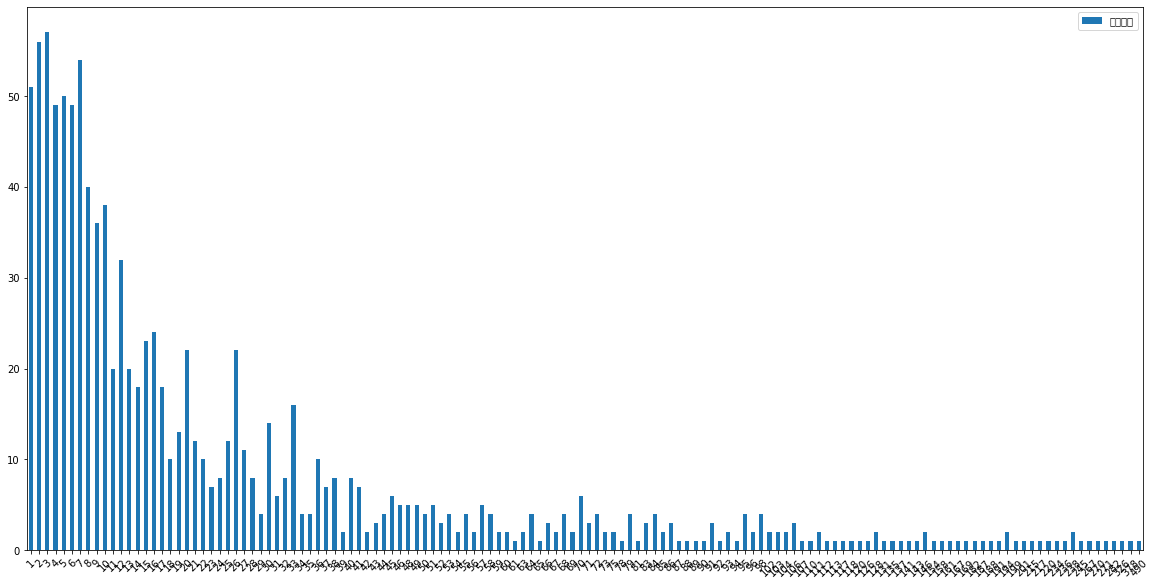

In [191]:
# 종목별 누적 매수 횟수 확인
trade_history['종목번호'].value_counts().to_frame()['종목번호'].value_counts().to_frame().sort_index().plot(kind="bar", figsize=(20,10), rot=45)

In [192]:
# 매수 종목으로 등장한 횟수 x 회 까지 제외
x = 0
bid_count = trade_history['종목번호'].value_counts().to_frame()
ex_stocks = bid_count[bid_count['종목번호'] <= x].index
ex_stocks

# 제외
trade_history_ex1 = trade_history[~trade_history['종목번호'].isin(ex_stocks)]
trade_history_ex1

,Unnamed: 0,기준년월,그룹번호,그룹내고객수,종목번호,그룹내_매수여부,그룹내_매도여부,매수고객수,매도고객수,평균매수수량,평균매도수량,매수가격_중앙값,매도가격_중앙값
0,0,201907,MAD01,288,A000660,Y,Y,7,17,19,234,74800,78500
1,1,201907,MAD01,288,A001820,Y,Y,3,4,533,154,47385,46700
2,2,201907,MAD01,288,A004020,Y,Y,3,3,409,528,41411,40000
3,3,201907,MAD01,288,A005380,Y,Y,4,3,323,451,140602,140628
4,4,201907,MAD01,288,A005930,Y,Y,13,19,34,101,45350,46850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,30195,202006,MAD48,163,A207940,Y,Y,3,4,3,3,835000,797000
30196,30196,202006,MAD48,163,A272210,Y,Y,3,3,90,42,9900,8870
30197,30197,202006,MAD48,163,A285130,Y,Y,6,4,271,162,109100,98000
30198,30198,202006,MAD48,163,A316140,Y,Y,5,4,386,735,10050,9920


In [193]:
# 그래프를 위한 merge
graph_merge = trade_history_ex1.merge(stocks_info_stop[['종목번호','종목명']], how='left',left_on='종목번호', right_on="종목번호", suffixes=('', 'x'))
graph_merge

NameError: name 'stocks_info_stop' is not defined

In [194]:
# 그룹 내 매수 변화 1년 그래프
#################### Visual Studio Code 전용 한글 폰트 적용 ###################
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font_name = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font_name)
##############################################################################
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12)) = plt.subplots(nrows=4, ncols=3)
figure.set_size_inches(18,25)

group = "MAD01"

sns.barplot(data=graph_merge[(graph_merge['그룹번호']==group) & (graph_merge['기준년월']==201907)].sort_values(by='매수고객수', ascending=False)[:10], x='종목명', y='매수고객수', ax=ax1)
sns.barplot(data=graph_merge[(graph_merge['그룹번호']==group) & (graph_merge['기준년월']==201908)].sort_values(by='매수고객수', ascending=False)[:10], x='종목명', y='매수고객수', ax=ax2)
sns.barplot(data=graph_merge[(graph_merge['그룹번호']==group) & (graph_merge['기준년월']==201909)].sort_values(by='매수고객수', ascending=False)[:10], x='종목명', y='매수고객수', ax=ax3)
sns.barplot(data=graph_merge[(graph_merge['그룹번호']==group) & (graph_merge['기준년월']==201910)].sort_values(by='매수고객수', ascending=False)[:10], x='종목명', y='매수고객수', ax=ax4)
sns.barplot(data=graph_merge[(graph_merge['그룹번호']==group) & (graph_merge['기준년월']==201911)].sort_values(by='매수고객수', ascending=False)[:10], x='종목명', y='매수고객수', ax=ax5)
sns.barplot(data=graph_merge[(graph_merge['그룹번호']==group) & (graph_merge['기준년월']==201912)].sort_values(by='매수고객수', ascending=False)[:10], x='종목명', y='매수고객수', ax=ax6)
sns.barplot(data=graph_merge[(graph_merge['그룹번호']==group) & (graph_merge['기준년월']==202001)].sort_values(by='매수고객수', ascending=False)[:10], x='종목명', y='매수고객수', ax=ax7)
sns.barplot(data=graph_merge[(graph_merge['그룹번호']==group) & (graph_merge['기준년월']==202002)].sort_values(by='매수고객수', ascending=False)[:10], x='종목명', y='매수고객수', ax=ax8)
sns.barplot(data=graph_merge[(graph_merge['그룹번호']==group) & (graph_merge['기준년월']==202003)].sort_values(by='매수고객수', ascending=False)[:10], x='종목명', y='매수고객수', ax=ax9)
sns.barplot(data=graph_merge[(graph_merge['그룹번호']==group) & (graph_merge['기준년월']==202004)].sort_values(by='매수고객수', ascending=False)[:10], x='종목명', y='매수고객수', ax=ax10)
sns.barplot(data=graph_merge[(graph_merge['그룹번호']==group) & (graph_merge['기준년월']==202005)].sort_values(by='매수고객수', ascending=False)[:10], x='종목명', y='매수고객수', ax=ax11)
sns.barplot(data=graph_merge[(graph_merge['그룹번호']==group) & (graph_merge['기준년월']==202006)].sort_values(by='매수고객수', ascending=False)[:10], x='종목명', y='매수고객수', ax=ax12)


ax1.set(title="201907")
ax2.set(title="201908")
ax3.set(title="201909")
ax4.set(title="201910")
ax5.set(title="201911")
ax6.set(title="201912")
ax7.set(title="202001")
ax8.set(title="202002")
ax9.set(title="202003")
ax10.set(title="202004")
ax11.set(title="202005")
ax12.set(title="202006")

ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=45)
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=45)
ax5.set_xticklabels(ax5.get_xticklabels(),rotation=45)
ax6.set_xticklabels(ax6.get_xticklabels(),rotation=45)
ax7.set_xticklabels(ax7.get_xticklabels(),rotation=45)
ax8.set_xticklabels(ax8.get_xticklabels(),rotation=45)
ax9.set_xticklabels(ax9.get_xticklabels(),rotation=45)
ax10.set_xticklabels(ax10.get_xticklabels(),rotation=45)
ax11.set_xticklabels(ax11.get_xticklabels(),rotation=45)
ax12.set_xticklabels(ax12.get_xticklabels(),rotation=45)

NameError: name 'fm' is not defined

In [359]:
# trade_history = trade_history[trade_history['매수고객수']>0]
# trade_history

In [360]:
# 그룹 내에서 거래가 1회 이상인 종목
traded_stocks = trade_history_ex1['종목번호'].unique()
len(traded_stocks)

1066

In [184]:
stocks_price_history

,index,기준일자,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,종목시가,종목고가,종목저가,종목종가,거래량,거래금액_만원단위
0,0,20190701,A000020,동화약품,N,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,9680,9840,9680,9710,31341,30581
1,1,20190701,A000080,하이트진로,N,코스피,제조업,음료 제조업,알코올음료 제조업,20550,20550,20200,20300,127186,258535
2,2,20190701,A000100,유한양행,Y,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,259000,267500,250000,251500,395757,10139357
3,3,20190701,A000120,CJ대한통운,N,코스피,운수 및 창고업,육상운송 및 파이프라인 운송업,도로 화물 운송업,136500,137000,133000,136000,62513,846100
4,4,20190701,A000140,하이트진로홀딩스,Y,코스피,금융 및 보험업,금융업,기타 금융업,9060,9190,8910,9000,7661,6896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286056,286056,20200728,A336370,두산솔루스,N,코스피,제조업,통신장비 제조업,전자부품 제조업,37050,39150,37000,38150,1764085,6755086
286057,286057,20200728,A33637K,두산솔루스1우,N,코스피,제조업,통신장비 제조업,전자부품 제조업,18100,19350,17950,18250,302925,565624
286058,286058,20200728,A33637L,두산솔루스2우B,N,코스피,제조업,통신장비 제조업,전자부품 제조업,37000,38650,36500,37700,59460,224214
286059,286059,20200728,A344820,케이씨씨글라스,N,코스피,제조업,비금속 광물제품 제조업,유리 및 유리제품 제조업,33500,33500,32250,32400,56962,186549


In [185]:
f_stock_price_history = stocks_price_history[stocks_price_history['종목번호'].isin(traded_stocks)]
f_stock_price_history

NameError: name 'traded_stocks' is not defined

In [183]:
# 종목 info
stocks_info = f_stock_price_history.drop_duplicates(subset=['종목번호'])[['종목번호','종목명','20년7월TOP3대상여부','시장구분','표준산업구분코드_대분류','표준산업구분코드_중분류','표준산업구분코드_소분류']]
stocks_info

NameError: name 'f_stock_price_history' is not defined

In [364]:
# # 데이터 저장
# f_stock_price_history.to_csv("traded_stocks_info.csv")

In [365]:
stop_data = f_stock_price_history[f_stock_price_history['거래량']==0]['종목명'].value_counts().to_frame()
stop_data

,종목명
셀루메드,175
럭슬,118
내츄럴엔도텍,113
경남제약,108
포티스,94
...,...
한화우,1
루미마이크로,1
셀바스헬스케어,1
에이치엘비생명과학,1


In [366]:
# 거래정지 원인 파악을 위한
f_stock_price_history[(f_stock_price_history['종목명']=="흥아해운") & (f_stock_price_history['거래량']==0)]

,index,기준일자,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,종목시가,종목고가,종목저가,종목종가,거래량,거래금액_만원단위
196059,196059,20200330,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,0,0,0,258,0,0
197143,197143,20200331,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,0,0,0,258,0,0
198227,198227,20200401,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,0,0,0,258,0,0
199311,199311,20200402,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,0,0,0,258,0,0
200395,200395,20200403,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,0,0,0,258,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280691,280691,20200722,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,0,0,0,258,0,0
281778,281778,20200723,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,0,0,0,258,0,0
282865,282865,20200724,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,0,0,0,258,0,0
283952,283952,20200727,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,0,0,0,258,0,0


In [367]:
# 거래정지횟수 데이터 추가
stocks_info_stop = stocks_info.merge(stop_data, how='left',left_on='종목명', right_index=True, suffixes=('', 'x')).rename(columns={'종목명x':'정지이력'})
stocks_info_stop['정지이력'].fillna(value=0, inplace=True)
stocks_info_stop

,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,정지이력
0,A000020,동화약품,N,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,0.0
1,A000080,하이트진로,N,코스피,제조업,음료 제조업,알코올음료 제조업,0.0
2,A000100,유한양행,Y,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,3.0
3,A000120,CJ대한통운,N,코스피,운수 및 창고업,육상운송 및 파이프라인 운송업,도로 화물 운송업,0.0
4,A000140,하이트진로홀딩스,Y,코스피,금융 및 보험업,금융업,기타 금융업,0.0
...,...,...,...,...,...,...,...,...
183938,A237820,플레이디,N,코스닥,전문· 과학 및 기술 서비스업,전문서비스업,광고업,0.0
186020,A198080,엔피디,N,코스닥,제조업,통신장비 제조업,전자부품 제조업,0.0
245858,A353810,이지바이오,Y,코스닥,제조업,식료품 제조업,동물용 사료 및 조제식품 제조업,2.0
254499,A298060,에스씨엠생명과학,N,코스닥,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,0.0


In [368]:
# Y 항목중 거래정지이력 있는애들
stocks_info_stop[(stocks_info_stop['20년7월TOP3대상여부']=="Y") & (stocks_info_stop['정지이력']>0)]

,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,정지이력
2,A000100,유한양행,Y,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,3.0
17,A000885,한화우,Y,코스피,제조업,의약품 제외,기타 화학제품 제조업,1.0
147,A008060,대덕,Y,코스피,제조업,통신장비 제조업,전자부품 제조업,14.0
181,A010145,삼성중공우,Y,코스피,제조업,기타 운송장비 제조업,선박 및 보트 건조업,3.0
220,A014100,메디앙스,Y,코스닥,제조업,의약품 제외,기타 화학제품 제조업,89.0
256,A019170,신풍제약,Y,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,4.0
335,A033250,체시스,Y,코스피,제조업,자동차 및 트레일러 제조업,자동차 신품 부품 제조업,1.0
511,A058110,멕아이씨에스,Y,코스닥,제조업,의료· 정밀· 광학기기 및 시계 제조업,의료용 기기 제조업,3.0
555,A066430,와이오엠,Y,코스닥,도매 및 소매업,도매 및 상품 중개업,기타 전문 도매업,1.0
724,A102940,코오롱생명과학,Y,코스닥,제조업,의료용 물질 및 의약품 제조업,기초 의약물질 및 생물학적 제제 제조업,1.0


In [426]:
from datetime import datetime
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import font_manager as fm, rc
import matplotlib as mpl
import matplotlib.pyplot as plt
# 필요 함수 세팅

# 그룹과 일자 input 시 매수많이 일어난 top 추출함수
def which_is_top(group, date, top):
    data = trade_history[(trade_history['기준년월'] == date) & (trade_history['그룹번호'] == ("MAD"+group))]
    data = data.sort_values(by=["매수고객수"],ascending=False)
    data = data[data['매수고객수'] > 0][:top]

    data = data.merge(stocks_info, how="inner", on="종목번호")
    return data

# 종목명으로 종목코드 가져오기
def code_by_name(name):
    return stocks_info.loc[stocks_info['종목명'] == name]

# 종목코드로 종목명 가져오기
def name_by_code(code):
    return stocks_info.loc[stocks_info['종목번호'] == code]

def get_std(code, start_month, end_month):
    print(code)
    stocks_price_history['기준일자'] = pd.to_datetime(stocks_price_history['기준일자'], format="%Y%m%d")

    start = start_month
    end = end_month

    # 지정종목, 기간 데이터 추출
    data = stocks_price_history[(stocks_price_history['종목번호'] == code) & (stocks_price_history['기준일자'] >= start) & (stocks_price_history['기준일자'] < end)]

    # 거래량 0 제거
    data = data[data['거래량'] > 0]
    print("데이터 갯수 : ",len(data))
    if len(data) == 0:
        stdrate_year = None
    else:
        year = 252
        avg = data['종목종가'].mean()
        std_day = (data['종목종가'].std()/avg)/np.sqrt(len(data))
        stdrate_year = std_day * np.sqrt(year) * 100
        print(data['종목명'].tolist()[0], stdrate_year)

    return stdrate_year

# 종목 모멘텀 구하기
def get_momentom(code, start_month, end_month):
    print(code)
    stocks_price_history['기준일자'] = pd.to_datetime(stocks_price_history['기준일자'], format="%Y%m%d")

    start = start_month
    end = end_month

    # 지정종목, 기간 데이터 추출
    data = stocks_price_history[(stocks_price_history['종목번호'] == code) & (stocks_price_history['기준일자'] >= start) & (
                stocks_price_history['기준일자'] < end)]

    # 거래량 0 제거
#     data = data[data['거래량'] > 0]
    if (len(data) == 0):
        mom = None
    else:
        close_prices = data['종목종가'].tolist()
        # print(close_prices)
        mom = np.log(close_prices[-1]/close_prices[0])*100
        print(data['종목명'].tolist()[0], mom)
    return mom

# 가격변화률 구하기
def get_change_rate(code, start_month, end_month):
    print(code)
    stocks_price_history['기준일자'] = pd.to_datetime(stocks_price_history['기준일자'], format="%Y%m%d")

    start = start_month
    end = end_month

    # 지정종목, 기간 데이터 추출
    data = stocks_price_history[(stocks_price_history['종목번호'] == code) & (stocks_price_history['기준일자'] >= start) & (
                stocks_price_history['기준일자'] < end)]
    if(len(data)==0):
        return None
    else:
        start_price = data['종목종가'].tolist()[0]
        lowest_price = data['종목종가'].min()
        highest_price = data['종목종가'].max()

        # , np.log(highest_price/start_price)*100
        return np.log(lowest_price/start_price)*100
    


In [370]:
stocks_info = stocks_info_stop
stocks_info

,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,정지이력
0,A000020,동화약품,N,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,0.0
1,A000080,하이트진로,N,코스피,제조업,음료 제조업,알코올음료 제조업,0.0
2,A000100,유한양행,Y,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,3.0
3,A000120,CJ대한통운,N,코스피,운수 및 창고업,육상운송 및 파이프라인 운송업,도로 화물 운송업,0.0
4,A000140,하이트진로홀딩스,Y,코스피,금융 및 보험업,금융업,기타 금융업,0.0
...,...,...,...,...,...,...,...,...
183938,A237820,플레이디,N,코스닥,전문· 과학 및 기술 서비스업,전문서비스업,광고업,0.0
186020,A198080,엔피디,N,코스닥,제조업,통신장비 제조업,전자부품 제조업,0.0
245858,A353810,이지바이오,Y,코스닥,제조업,식료품 제조업,동물용 사료 및 조제식품 제조업,2.0
254499,A298060,에스씨엠생명과학,N,코스닥,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,0.0


In [422]:
# stocks_info['변동성_현월'] = 0
# stocks_info['변동성_전월'] = 0

# stocks_info['모멘텀_1'] = 0
# stocks_info['모멘텀_3'] = 0

stocks_info['최고상승율_현월'] = 0
stocks_info['최고하락율_현월'] = 0
stocks_info['최고상승율_전월'] = 0
stocks_info['최고하락율_전월'] = 0

stocks_info

,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,정지이력,변동성_현월,변동성_전월,모멘텀_1,모멘텀_3,최고상승율_현월,최고하락율_현월,최고상승율_전월,최고하락율_전월
0,A000020,동화약품,N,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,0.0,9.192805,6.325298,2.436174,2.559555,0,0,0,0
1,A000080,하이트진로,N,코스피,제조업,음료 제조업,알코올음료 제조업,0.0,7.131278,7.010732,4.225981,5.492966,0,0,0,0
2,A000100,유한양행,Y,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,3.0,15.925354,2.924712,9.066980,3.004518,0,0,0,0
3,A000120,CJ대한통운,N,코스피,운수 및 창고업,육상운송 및 파이프라인 운송업,도로 화물 운송업,0.0,4.959833,4.907247,0.647251,8.408312,0,0,0,0
4,A000140,하이트진로홀딩스,Y,코스피,금융 및 보험업,금융업,기타 금융업,0.0,8.045202,10.135311,2.687302,16.877733,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183938,A237820,플레이디,N,코스닥,전문· 과학 및 기술 서비스업,전문서비스업,광고업,0.0,NaN,NaN,NaN,NaN,0,0,0,0
186020,A198080,엔피디,N,코스닥,제조업,통신장비 제조업,전자부품 제조업,0.0,NaN,NaN,NaN,NaN,0,0,0,0
245858,A353810,이지바이오,Y,코스닥,제조업,식료품 제조업,동물용 사료 및 조제식품 제조업,2.0,NaN,NaN,NaN,NaN,0,0,0,0
254499,A298060,에스씨엠생명과학,N,코스닥,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,0.0,NaN,NaN,NaN,NaN,0,0,0,0


In [372]:
# 종목체크
stocks_price_history[stocks_price_history['종목명']=="흥아해운"]

,index,기준일자,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,종목시가,종목고가,종목저가,종목종가,거래량,거래금액_만원단위
65,65,20190701,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,610,666,605,620,2104918,132857
1092,1092,20190702,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,620,620,609,612,693009,42483
2119,2119,20190703,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,619,620,600,604,708560,43082
3146,3146,20190704,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,604,606,589,592,724354,43122
4173,4173,20190705,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,599,601,583,592,613155,36072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280691,280691,20200722,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,0,0,0,258,0,0
281778,281778,20200723,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,0,0,0,258,0,0
282865,282865,20200724,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,0,0,0,258,0,0
283952,283952,20200727,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,0,0,0,258,0,0


In [427]:
target_date = 202001
check_date = 201912
start = datetime.strptime(str(check_date), '%Y%m')
end = datetime.strptime(str(target_date), '%Y%m')

# stocks_info['변동성_현월'] = stocks_info['종목번호'].apply(lambda x: get_std(x, start, end))
# stocks_info['변동성_전월'] = stocks_info['종목번호'].apply(lambda x: get_std(x, start-relativedelta(months=+1), end-relativedelta(months=+1)))

# stocks_info['모멘텀_1'] = stocks_info['종목번호'].apply(lambda x: get_momentom(x, start, end))
# stocks_info['모멘텀_3'] = stocks_info['종목번호'].apply(lambda x: get_momentom(x, start-relativedelta(months=+2), end))

stocks_info['최고하락율_현월'] = stocks_info['종목번호'].apply(lambda x: get_change_rate(x, start, end))
stocks_info['최고하락율_전월'] = stocks_info['종목번호'].apply(lambda x: get_change_rate(x, start-relativedelta(months=+1), end-relativedelta(months=+1)))

A000020
A000080
A000100
A000120
A000140
A000145
A000150
A000210
A000220
A000250
A000270
A000440
A000520
A000660
A000720
A000810
A000880
A000885
A000890
A000910
A000990
A001000
A001040
A001060
A001120
A001140
A001200
A001210
A001230
A001260
A001340
A001360
A001440
A001510
A001520
A001540
A001550
A001680
A001740
A001820
A001840
A002020
A002070
A002100
A002140
A002210
A002320
A002360
A002410
A002630
A002700
A002720
A002760
A002780
A002790
A002800
A002900
A003000
A003010
A003060
A003090
A003220
A003230
A003280
A003350
A003410
A003490
A003495
A003520
A003550
A003560
A003620
A003670
A003680
A003850
A004020
A004060
A004100
A004140
A004170
A004270
A004310
A004370
A004410
A004430
A004540
A004650
A004710
A004720
A004770
A004800
A004830
A004835
A004870
A004980
A004990
A00499K
A005070
A005110
A005180
A005290
A005320
A005360
A005380
A005385
A005390
A005420
A005490
A005500
A005690
A005860
A005870
A005930
A005935
A005940
A005950
A006050
A006060
A006090
A006120
A006125
A006280
A006360
A006400
A006405


A336260
A33626K
A33626L
A336370
A33637K
A33637L
A318010
A317870
A272110
A317530
A322180
A084850
A214260
A272210
A216080
A322000
A103840
A190650
A297090
A321550
A308170
A278650
A290510
A124560
A322510
A226330
A235980
A288330
A327260
A344820
A294630
A294140
A274090
A204270
A237820
A198080
A353810
A298060
A297890
A000020
A000080
A000100
A000120
A000140
A000145
A000150
A000210
A000220
A000250
A000270
A000440
A000520
A000660
A000720
A000810
A000880
A000885
A000890
A000910
A000990
A001000
A001040
A001060
A001120
A001140
A001200
A001210
A001230
A001260
A001340
A001360
A001440
A001510
A001520
A001540
A001550
A001680
A001740
A001820
A001840
A002020
A002070
A002100
A002140
A002210
A002320
A002360
A002410
A002630
A002700
A002720
A002760
A002780
A002790
A002800
A002900
A003000
A003010
A003060
A003090
A003220
A003230
A003280
A003350
A003410
A003490
A003495
A003520
A003550
A003560
A003620
A003670
A003680
A003850
A004020
A004060
A004100
A004140
A004170
A004270
A004310
A004370
A004410
A004430
A004540


A294870
A298040
A298050
A298380
A298690
A299660
A299900
A302430
A302550
A303030
A305090
A307930
A308100
A312610
A316140
A317320
A319660
A289010
A234340
A300080
A241840
A317850
A313760
A148150
A318000
A317330
A282880
A228670
A317830
A286750
A195500
A311390
A256150
A317120
A244460
A234690
A158430
A300120
A336260
A33626K
A33626L
A336370
A33637K
A33637L
A318010
A317870
A272110
A317530
A322180
A084850
A214260
A272210
A216080
A322000
A103840
A190650
A297090
A321550
A308170
A278650
A290510
A124560
A322510
A226330
A235980
A288330
A327260
A344820
A294630
A294140
A274090
A204270
A237820
A198080
A353810
A298060
A297890


In [428]:
# stocks_info.drop(columns=['최고상승률_현월', '최고하락율_현월','최고상승률_전월','최고하락율_전월'], inplace=True)

In [440]:
stocks_info

,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,정지이력,변동성_현월,변동성_전월,모멘텀_1,모멘텀_3,최고상승율_현월,최고하락율_현월,최고상승율_전월,최고하락율_전월
0,A000020,동화약품,N,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,0.0,9.192805,6.325298,2.436174,2.559555,2.436174,-6.758467,7.438372,0.000000
1,A000080,하이트진로,N,코스피,제조업,음료 제조업,알코올음료 제조업,0.0,7.131278,7.010732,4.225981,5.492966,4.398246,-2.734902,4.497011,-3.819909
2,A000100,유한양행,Y,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,3.0,15.925354,2.924712,9.066980,3.004518,13.005313,-0.231750,0.681047,-2.537622
3,A000120,CJ대한통운,N,코스피,운수 및 창고업,육상운송 및 파이프라인 운송업,도로 화물 운송업,0.0,4.959833,4.907247,0.647251,8.408312,1.929320,-3.300630,4.652002,-0.317965
4,A000140,하이트진로홀딩스,Y,코스피,금융 및 보험업,금융업,기타 금융업,0.0,8.045202,10.135311,2.687302,16.877733,2.687302,-4.781787,4.930576,-5.949710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183938,A237820,플레이디,N,코스닥,전문· 과학 및 기술 서비스업,전문서비스업,광고업,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186020,A198080,엔피디,N,코스닥,제조업,통신장비 제조업,전자부품 제조업,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245858,A353810,이지바이오,Y,코스닥,제조업,식료품 제조업,동물용 사료 및 조제식품 제조업,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254499,A298060,에스씨엠생명과학,N,코스닥,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [432]:
# None 데이터 종합
stocks_info.isnull().sum()

종목번호              0
종목명               0
20년7월TOP3대상여부     0
시장구분              0
표준산업구분코드_대분류      0
표준산업구분코드_중분류      0
표준산업구분코드_소분류      0
정지이력              0
변동성_현월           12
변동성_전월           19
모멘텀_1            10
모멘텀_3            10
최고상승율_현월         10
최고하락율_현월         10
최고상승율_전월         16
최고하락율_전월         16
dtype: int64

In [9]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [47]:
# 재무정보 로드
fin_data_path = r'C:\Users\dlagh\Downloads\재무정보.csv'

In [48]:
fin_data = pd.read_csv(fin_data_path, encoding='utf-8')
fin_data

,종목번호,상장주식수,201906_매출,201909_매출,201912_매출,202003_매출,202006_매출,201906_영업이익,201909_영업이익,201912_영업이익,...,201906_당기순이익,201909_당기순이익,201912_당기순이익,202003_당기순이익,202006_당기순이익,201906_부채비율,201909_부채비율,201912_부채비율,202003_부채비율,202006_부채비율
0,000020,"27,931,470",749,742,833,670,698,-9,7,78,...,-6,2,79,23,67,27.83,27.42,24.98,25.61,24.78
1,000080,"70,133,611",5244,5291,5586,5339,5816,106,492,327,...,-292,258,-252,334,349,216.79,209.50,216.58,256.41,305.21
2,000100,"66,856,810",3594,3823,3937,3133,4155,-54,33,85,...,57,126,27,1154,343,28.13,29.48,28.32,29.92,32.64
3,000120,"22,812,344",25348,26218,28257,25154,26500,718,887,1013,...,176,130,328,114,362,158.94,159.02,149.23,154.80,153.73
4,000140,"23,206,765",5221,5267,5566,5315,5797,148,518,353,...,-306,235,-166,279,369,288.38,280.42,290.48,327.01,377.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,237820,"12,827,140",NaN,88,86,77,72,NaN,15,19,...,NaN,11,15,5,1,NaN,122.35,140.76,64.29,52.63
1083,198080,"21,535,185",NaN,799,718,641,406,NaN,86,57,...,NaN,72,21,10,5,NaN,294.96,254.37,141.20,108.36
1084,353810,"2,286,728",NaN,NaN,NaN,NaN,215,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,28,NaN,NaN,NaN,NaN,198.39
1085,298060,"11,858,116",NaN,NaN,NaN,-,1,NaN,NaN,NaN,...,NaN,NaN,NaN,-39,-104,NaN,NaN,NaN,79.99,18.12


In [49]:
# fin_data['201906_발행주식수'] = 0
# fin_data['201909_발행주식수'] = 0
# fin_data['201912_발행주식수'] = 0
# fin_data['202003_발행주식수'] = 0
# fin_data['202006_발행주식수'] = 0
# fin_data

In [20]:
code_list = fin_data['종목번호'].tolist()
code_list

['000020',
 '000080',
 '000100',
 '000120',
 '000140',
 '000145',
 '000150',
 '000210',
 '000220',
 '000250',
 '000270',
 '000440',
 '000520',
 '000660',
 '000720',
 '000810',
 '000880',
 '000885',
 '000890',
 '000910',
 '000970',
 '000990',
 '001000',
 '001040',
 '001060',
 '001120',
 '001140',
 '001200',
 '001210',
 '001230',
 '001260',
 '001340',
 '001360',
 '001390',
 '001440',
 '001510',
 '001520',
 '001540',
 '001550',
 '001680',
 '001740',
 '001820',
 '001840',
 '002020',
 '002070',
 '002100',
 '002140',
 '002210',
 '002320',
 '002360',
 '002410',
 '002630',
 '002700',
 '002720',
 '002760',
 '002780',
 '002790',
 '002800',
 '002900',
 '003000',
 '003010',
 '003060',
 '003090',
 '003220',
 '003230',
 '003280',
 '003350',
 '003410',
 '003490',
 '003495',
 '003520',
 '003550',
 '003560',
 '003620',
 '003670',
 '003680',
 '003850',
 '004020',
 '004060',
 '004100',
 '004140',
 '004170',
 '004270',
 '004310',
 '004370',
 '004410',
 '004430',
 '004540',
 '004650',
 '004710',
 '004720',

In [74]:
def issued(row):
    code = row['종목번호']
    print(code[-1])
    if code[-1] != '0':
        code1 = list(code)
        code1[-1] = "0"
        str1 = ''.join(code1)
        code = str1
    
    url = 'https://navercomp.wisereport.co.kr/v2/company/ajax/cF1001.aspx?cmp_cd={}&fin_typ=0&freq_typ=Q&encparam=VG5ybFRrbFBRRDFhQ1BORG1sWHZyZz09&id=QmZIZ20rMn'.format(code)
    print(code)
    res = requests.get(url)

    bs = BeautifulSoup(res.text, 'html.parser')
    data = bs.select("div#highlight_D_Q tbody tr")
    issued = data[-2]
    title = issued.select("tr th")[0].text
    print(title)
    _1906 = issued.select("td")[0].text
    _1909 = issued.select("td")[1].text
    _1912 = issued.select("td")[2].text
    _2003 = issued.select("td")[3].text
    _2006 = issued.select("td")[4].text
#     return pd.Series([_1906,_1909,_1912,_2003,_2006],index=['201906_발행주식수','201909_발행주식수','201912_발행주식수','202003_발행주식수','202006_발행주식수'])
    return _1906, _1909, _1912, _2003, _2006

In [75]:
fin_data[['201906_발행주식수','201909_발행주식수','201912_발행주식수','202003_발행주식수','202006_발행주식수']] = fin_data.apply(issued, axis=1, result_type="expand")
# fin_data['201906_발행주식수'], fin_data['201909_발행주식수'], fin_data['201912_발행주식수'], fin_data['202003_발행주식수'], fin_data['202006_발행주식수'] = zip(*fin_data['종목번호'].apply(lambda x: _1906)

0
000020
발행주식수
0
000080
발행주식수
0
000100
발행주식수
0
000120
발행주식수
0
000140
발행주식수
5
000140
발행주식수
0
000150
발행주식수
0
000210
발행주식수
0
000220
발행주식수
0
000250
발행주식수
0
000270
발행주식수
0
000440
발행주식수
0
000520
발행주식수
0
000660
발행주식수
0
000720
발행주식수
0
000810
발행주식수
0
000880
발행주식수
5
000880
발행주식수
0
000890
발행주식수
0
000910
발행주식수
0
000970
발행주식수
0
000990
발행주식수
0
001000
발행주식수
0
001040
발행주식수
0
001060
발행주식수
0
001120
발행주식수
0
001140
발행주식수
0
001200
발행주식수
0
001210
발행주식수
0
001230
발행주식수
0
001260
발행주식수
0
001340
발행주식수
0
001360
발행주식수
0
001390
발행주식수
0
001440
발행주식수
0
001510
발행주식수
0
001520
발행주식수
0
001540
발행주식수
0
001550
발행주식수
0
001680
발행주식수
0
001740
발행주식수
0
001820
발행주식수
0
001840
발행주식수
0
002020
발행주식수
0
002070
발행주식수
0
002100
발행주식수
0
002140
발행주식수
0
002210
발행주식수
0
002320
발행주식수
0
002360
발행주식수
0
002410
발행주식수
0
002630
발행주식수
0
002700
발행주식수
0
002720
발행주식수
0
002760
발행주식수
0
002780
발행주식수
0
002790
발행주식수
0
002800
발행주식수
0
002900
발행주식수
0
003000
발행주식수
0
003010
발행주식수
0
003060
발행주식수
0
003090
발행주식수
0
003220
발행주식수
0
003230
발행주식수
0
003280
발행주식수
0
003350
발

발행주식수
0
065530
발행주식수
0
065620
발행주식수
0
065650
발행주식수
0
065660
발행주식수
0
065950
발행주식수
0
066130
발행주식수
0
066360
발행주식수
0
066410
발행주식수
0
066430
발행주식수
0
066570
발행주식수
0
066590
발행주식수
0
066700
발행주식수
0
066910
발행주식수
0
066970
발행주식수
0
067000
발행주식수
0
067010
발행주식수
0
067080
발행주식수
0
067160
발행주식수
0
067170
발행주식수
0
067290
발행주식수
0
067310
발행주식수
0
067390
발행주식수
0
067570
발행주식수
0
067630
발행주식수
0
067900
발행주식수
0
067990
발행주식수
0
068240
발행주식수
0
068270
발행주식수
0
068290
발행주식수
0
068330
발행주식수
0
068760
발행주식수
0
069080
발행주식수
0
069460
발행주식수
0
069620
발행주식수
0
071050
발행주식수
0
071200
발행주식수
0
071970
발행주식수
0
072020
발행주식수
0
072130
발행주식수
0
072470
발행주식수
0
072520
발행주식수
0
072870
발행주식수
0
073070
발행주식수
0
073110
발행주식수
0
073490
발행주식수
0
073540
발행주식수
0
073560
발행주식수
0
074600
발행주식수
0
074610
발행주식수
0
075970
발행주식수
0
076610
발행주식수
0
077360
발행주식수
0
077500
발행주식수
0
078070
발행주식수
0
078130
발행주식수
0
078150
발행주식수
0
078160
발행주식수
0
078340
발행주식수
0
078520
발행주식수
0
078590
발행주식수
0
078600
발행주식수
0
078890
발행주식수
0
078930
발행주식수
0
079160
발행주식수
0
079550
발행주식수
0
079940
발행주식수
0
07

In [76]:
fin_data

,종목번호,상장주식수,201906_매출,201909_매출,201912_매출,202003_매출,202006_매출,201906_영업이익,201909_영업이익,201912_영업이익,...,201906_부채비율,201909_부채비율,201912_부채비율,202003_부채비율,202006_부채비율,201906_발행주식수,201909_발행주식수,201912_발행주식수,202003_발행주식수,202006_발행주식수
0,000020,"27,931,470",749,742,833,670,698,-9,7,78,...,27.83,27.42,24.98,25.61,24.78,"27,931","27,931","27,931","27,931","27,931"
1,000080,"70,133,611",5244,5291,5586,5339,5816,106,492,327,...,216.79,209.50,216.58,256.41,305.21,"70,134","70,134","70,134","70,134","70,134"
2,000100,"66,856,810",3594,3823,3937,3133,4155,-54,33,85,...,28.13,29.48,28.32,29.92,32.64,"66,857","66,857","66,857","66,857","66,857"
3,000120,"22,812,344",25348,26218,28257,25154,26500,718,887,1013,...,158.94,159.02,149.23,154.80,153.73,"22,812","22,812","22,812","22,812","22,812"
4,000140,"23,206,765",5221,5267,5566,5315,5797,148,518,353,...,288.38,280.42,290.48,327.01,377.81,"23,207","23,207","23,207","23,207","23,207"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,237820,"12,827,140",NaN,88,86,77,72,NaN,15,19,...,NaN,122.35,140.76,64.29,52.63,,,"9,027",,
1083,198080,"21,535,185",NaN,799,718,641,406,NaN,86,57,...,NaN,294.96,254.37,141.20,108.36,"13,800","13,800","13,800","21,535","21,535"
1084,353810,"2,286,728",NaN,NaN,NaN,NaN,215,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,198.39,,,,,
1085,298060,"11,858,116",NaN,NaN,NaN,-,1,NaN,NaN,NaN,...,NaN,NaN,NaN,79.99,18.12,,,"9,173",,


In [80]:
fin_data = fin_data.drop(columns=['상장주식수'])
fin_data

,종목번호,201906_매출,201909_매출,201912_매출,202003_매출,202006_매출,201906_영업이익,201909_영업이익,201912_영업이익,202003_영업이익,...,201906_부채비율,201909_부채비율,201912_부채비율,202003_부채비율,202006_부채비율,201906_발행주식수,201909_발행주식수,201912_발행주식수,202003_발행주식수,202006_발행주식수
0,000020,749,742,833,670,698,-9,7,78,27,...,27.83,27.42,24.98,25.61,24.78,"27,931","27,931","27,931","27,931","27,931"
1,000080,5244,5291,5586,5339,5816,106,492,327,561,...,216.79,209.50,216.58,256.41,305.21,"70,134","70,134","70,134","70,134","70,134"
2,000100,3594,3823,3937,3133,4155,-54,33,85,11,...,28.13,29.48,28.32,29.92,32.64,"66,857","66,857","66,857","66,857","66,857"
3,000120,25348,26218,28257,25154,26500,718,887,1013,582,...,158.94,159.02,149.23,154.80,153.73,"22,812","22,812","22,812","22,812","22,812"
4,000140,5221,5267,5566,5315,5797,148,518,353,581,...,288.38,280.42,290.48,327.01,377.81,"23,207","23,207","23,207","23,207","23,207"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,237820,NaN,88,86,77,72,NaN,15,19,5,...,NaN,122.35,140.76,64.29,52.63,,,"9,027",,
1083,198080,NaN,799,718,641,406,NaN,86,57,15,...,NaN,294.96,254.37,141.20,108.36,"13,800","13,800","13,800","21,535","21,535"
1084,353810,NaN,NaN,NaN,NaN,215,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,198.39,,,,,
1085,298060,NaN,NaN,NaN,-,1,NaN,NaN,NaN,-31,...,NaN,NaN,NaN,79.99,18.12,,,"9,173",,


In [82]:
fin_data = fin_data.replace(regex=r',', value='')
fin_data

,종목번호,201906_매출,201909_매출,201912_매출,202003_매출,202006_매출,201906_영업이익,201909_영업이익,201912_영업이익,202003_영업이익,...,201906_부채비율,201909_부채비율,201912_부채비율,202003_부채비율,202006_부채비율,201906_발행주식수,201909_발행주식수,201912_발행주식수,202003_발행주식수,202006_발행주식수
0,000020,749,742,833,670,698,-9,7,78,27,...,27.83,27.42,24.98,25.61,24.78,27931,27931,27931,27931,27931
1,000080,5244,5291,5586,5339,5816,106,492,327,561,...,216.79,209.50,216.58,256.41,305.21,70134,70134,70134,70134,70134
2,000100,3594,3823,3937,3133,4155,-54,33,85,11,...,28.13,29.48,28.32,29.92,32.64,66857,66857,66857,66857,66857
3,000120,25348,26218,28257,25154,26500,718,887,1013,582,...,158.94,159.02,149.23,154.80,153.73,22812,22812,22812,22812,22812
4,000140,5221,5267,5566,5315,5797,148,518,353,581,...,288.38,280.42,290.48,327.01,377.81,23207,23207,23207,23207,23207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,237820,NaN,88,86,77,72,NaN,15,19,5,...,NaN,122.35,140.76,64.29,52.63,,,9027,,
1083,198080,NaN,799,718,641,406,NaN,86,57,15,...,NaN,294.96,254.37,141.20,108.36,13800,13800,13800,21535,21535
1084,353810,NaN,NaN,NaN,NaN,215,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,198.39,,,,,
1085,298060,NaN,NaN,NaN,-,1,NaN,NaN,NaN,-31,...,NaN,NaN,NaN,79.99,18.12,,,9173,,


In [108]:
fin_data['종목번호'] = 'A' + fin_data['종목번호']
fin_data

,종목번호,201906_매출,201909_매출,201912_매출,202003_매출,202006_매출,201906_영업이익,201909_영업이익,201912_영업이익,202003_영업이익,...,201906_부채비율,201909_부채비율,201912_부채비율,202003_부채비율,202006_부채비율,201906_발행주식수,201909_발행주식수,201912_발행주식수,202003_발행주식수,202006_발행주식수
0,A000020,749,742,833,670,698,-9,7,78,27,...,27.83,27.42,24.98,25.61,24.78,27931,27931,27931,27931,27931
1,A000080,5244,5291,5586,5339,5816,106,492,327,561,...,216.79,209.50,216.58,256.41,305.21,70134,70134,70134,70134,70134
2,A000100,3594,3823,3937,3133,4155,-54,33,85,11,...,28.13,29.48,28.32,29.92,32.64,66857,66857,66857,66857,66857
3,A000120,25348,26218,28257,25154,26500,718,887,1013,582,...,158.94,159.02,149.23,154.80,153.73,22812,22812,22812,22812,22812
4,A000140,5221,5267,5566,5315,5797,148,518,353,581,...,288.38,280.42,290.48,327.01,377.81,23207,23207,23207,23207,23207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,A237820,NaN,88,86,77,72,NaN,15,19,5,...,NaN,122.35,140.76,64.29,52.63,,,9027,,
1083,A198080,NaN,799,718,641,406,NaN,86,57,15,...,NaN,294.96,254.37,141.20,108.36,13800,13800,13800,21535,21535
1084,A353810,NaN,NaN,NaN,NaN,215,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,198.39,,,,,
1085,A298060,NaN,NaN,NaN,-,1,NaN,NaN,NaN,-31,...,NaN,NaN,NaN,79.99,18.12,,,9173,,


In [79]:
# change user PATH
user_path = r'C:\Users\dlagh\PycharmProjects\PINC\Mirae_data_research\data_set'

history_path = user_path + '\\trade_train.csv'
stocks_info_path = user_path + '\\stocks_price_history.csv'
# 데이터 불러오기
stocks_price_history = pd.read_csv(stocks_info_path, encoding='utf-8')
stocks_price_history

,index,기준일자,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,종목시가,종목고가,종목저가,종목종가,거래량,거래금액_만원단위
0,0,20190701,A000020,동화약품,N,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,9680,9840,9680,9710,31341,30581
1,1,20190701,A000080,하이트진로,N,코스피,제조업,음료 제조업,알코올음료 제조업,20550,20550,20200,20300,127186,258535
2,2,20190701,A000100,유한양행,Y,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,259000,267500,250000,251500,395757,10139357
3,3,20190701,A000120,CJ대한통운,N,코스피,운수 및 창고업,육상운송 및 파이프라인 운송업,도로 화물 운송업,136500,137000,133000,136000,62513,846100
4,4,20190701,A000140,하이트진로홀딩스,Y,코스피,금융 및 보험업,금융업,기타 금융업,9060,9190,8910,9000,7661,6896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286056,286056,20200728,A336370,두산솔루스,N,코스피,제조업,통신장비 제조업,전자부품 제조업,37050,39150,37000,38150,1764085,6755086
286057,286057,20200728,A33637K,두산솔루스1우,N,코스피,제조업,통신장비 제조업,전자부품 제조업,18100,19350,17950,18250,302925,565624
286058,286058,20200728,A33637L,두산솔루스2우B,N,코스피,제조업,통신장비 제조업,전자부품 제조업,37000,38650,36500,37700,59460,224214
286059,286059,20200728,A344820,케이씨씨글라스,N,코스피,제조업,비금속 광물제품 제조업,유리 및 유리제품 제조업,33500,33500,32250,32400,56962,186549


In [84]:
pp = stocks_price_history[['기준일자','종목번호','종목명','종목종가']]
pp

,기준일자,종목번호,종목명,종목종가
0,20190701,A000020,동화약품,9710
1,20190701,A000080,하이트진로,20300
2,20190701,A000100,유한양행,251500
3,20190701,A000120,CJ대한통운,136000
4,20190701,A000140,하이트진로홀딩스,9000
...,...,...,...,...
286056,20200728,A336370,두산솔루스,38150
286057,20200728,A33637K,두산솔루스1우,18250
286058,20200728,A33637L,두산솔루스2우B,37700
286059,20200728,A344820,케이씨씨글라스,32400


In [106]:
pp[pp['기준일자']==20190701]

,기준일자,종목번호,종목명,종목종가
0,20190701,A000020,동화약품,9710
1,20190701,A000080,하이트진로,20300
2,20190701,A000100,유한양행,251500
3,20190701,A000120,CJ대한통운,136000
4,20190701,A000140,하이트진로홀딩스,9000
...,...,...,...,...
1022,20190701,A308100,까스텔바작,12500
1023,20190701,A312610,에이에프더블류,21750
1024,20190701,A316140,우리금융지주,14000
1025,20190701,A317320,한화에스비아이스팩,3440


In [97]:
ppp = pp[(pp['기준일자']==20190701) | (pp['기준일자']==20191001) | (pp['기준일자']==20200102) | (pp['기준일자']==20200401) | (pp['기준일자']==20200701)]
ppp

,기준일자,종목번호,종목명,종목종가
0,20190701,A000020,동화약품,9710
1,20190701,A000080,하이트진로,20300
2,20190701,A000100,유한양행,251500
3,20190701,A000120,CJ대한통운,136000
4,20190701,A000140,하이트진로홀딩스,9000
...,...,...,...,...
265403,20200701,A336370,두산솔루스,33100
265404,20200701,A33637K,두산솔루스1우,17450
265405,20200701,A33637L,두산솔루스2우B,33350
265406,20200701,A344820,케이씨씨글라스,31300


In [126]:
pppp = ppp[ppp['기준일자']==20200701]
pppp

,기준일자,종목번호,종목명,종목종가
264321,20200701,A000020,동화약품,15200
264322,20200701,A000080,하이트진로,42450
264323,20200701,A000100,유한양행,52000
264324,20200701,A000120,CJ대한통운,157500
264325,20200701,A000140,하이트진로홀딩스,21350
...,...,...,...,...
265403,20200701,A336370,두산솔루스,33100
265404,20200701,A33637K,두산솔루스1우,17450
265405,20200701,A33637L,두산솔루스2우B,33350
265406,20200701,A344820,케이씨씨글라스,31300


In [127]:
fin_data = fin_data.merge(pppp[['종목번호','종목종가']], how='left', left_on='종목번호', right_on='종목번호').rename(columns={"종목종가":"202006_종가"})
fin_data

,종목번호,201906_매출,201909_매출,201912_매출,202003_매출,202006_매출,201906_영업이익,201909_영업이익,201912_영업이익,202003_영업이익,...,201906_발행주식수,201909_발행주식수,201912_발행주식수,202003_발행주식수,202006_발행주식수,201906_종가,201909_종가,201912_종가,202003_종가,202006_종가
0,A000020,749,742,833,670,698,-9,7,78,27,...,27931,27931,27931,27931,27931,9710.0,8100.0,8400.0,6580.0,15200
1,A000080,5244,5291,5586,5339,5816,106,492,327,561,...,70134,70134,70134,70134,70134,20300.0,27450.0,28900.0,26950.0,42450
2,A000100,3594,3823,3937,3133,4155,-54,33,85,11,...,66857,66857,66857,66857,66857,251500.0,229500.0,231500.0,224500.0,52000
3,A000120,25348,26218,28257,25154,26500,718,887,1013,582,...,22812,22812,22812,22812,22812,136000.0,142500.0,152500.0,128000.0,157500
4,A000140,5221,5267,5566,5315,5797,148,518,353,581,...,23207,23207,23207,23207,23207,9000.0,11150.0,13200.0,10200.0,21350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,A237820,NaN,88,86,77,72,NaN,15,19,5,...,,,9027,,,NaN,NaN,NaN,7290.0,12600
1083,A198080,NaN,799,718,641,406,NaN,86,57,15,...,13800,13800,13800,21535,21535,NaN,NaN,NaN,3265.0,4545
1084,A353810,NaN,NaN,NaN,NaN,215,NaN,NaN,NaN,NaN,...,,,,,,NaN,NaN,NaN,NaN,50000
1085,A298060,NaN,NaN,NaN,-,1,NaN,NaN,NaN,-31,...,,,9173,,,NaN,NaN,NaN,NaN,24700


In [133]:
import numpy as np

In [135]:
fin_data = fin_data.replace(r'\s+$', np.nan, regex=True)
fin_data

,종목번호,201906_매출,201909_매출,201912_매출,202003_매출,202006_매출,201906_영업이익,201909_영업이익,201912_영업이익,202003_영업이익,...,201906_발행주식수,201909_발행주식수,201912_발행주식수,202003_발행주식수,202006_발행주식수,201906_종가,201909_종가,201912_종가,202003_종가,202006_종가
0,A000020,749,742,833,670,698,-9,7,78,27,...,27931,27931,27931,27931,27931,9710.0,8100.0,8400.0,6580.0,15200
1,A000080,5244,5291,5586,5339,5816,106,492,327,561,...,70134,70134,70134,70134,70134,20300.0,27450.0,28900.0,26950.0,42450
2,A000100,3594,3823,3937,3133,4155,-54,33,85,11,...,66857,66857,66857,66857,66857,251500.0,229500.0,231500.0,224500.0,52000
3,A000120,25348,26218,28257,25154,26500,718,887,1013,582,...,22812,22812,22812,22812,22812,136000.0,142500.0,152500.0,128000.0,157500
4,A000140,5221,5267,5566,5315,5797,148,518,353,581,...,23207,23207,23207,23207,23207,9000.0,11150.0,13200.0,10200.0,21350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,A237820,NaN,88,86,77,72,NaN,15,19,5,...,NaN,NaN,9027,NaN,NaN,NaN,NaN,NaN,7290.0,12600
1083,A198080,NaN,799,718,641,406,NaN,86,57,15,...,13800,13800,13800,21535,21535,NaN,NaN,NaN,3265.0,4545
1084,A353810,NaN,NaN,NaN,NaN,215,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000
1085,A298060,NaN,NaN,NaN,-,1,NaN,NaN,NaN,-31,...,NaN,NaN,9173,NaN,NaN,NaN,NaN,NaN,NaN,24700


In [174]:
fin_data = pd.read_csv("data_fill.csv", encoding='utf-8')
fin_data

,Unnamed: 0,종목번호,201906_매출,201909_매출,201912_매출,202003_매출,202006_매출,201906_영업이익,201909_영업이익,201912_영업이익,...,201906_발행주식수,201909_발행주식수,201912_발행주식수,202003_발행주식수,202006_발행주식수,201906_종가,201909_종가,201912_종가,202003_종가,202006_종가
0,0,A000020,749,742,833,670,698,-9,7,78,...,27931,27931,27931,27931,27931,9710.0,8100.0,8400.0,6580.0,15200
1,1,A000080,5244,5291,5586,5339,5816,106,492,327,...,70134,70134,70134,70134,70134,20300.0,27450.0,28900.0,26950.0,42450
2,2,A000100,3594,3823,3937,3133,4155,-54,33,85,...,66857,66857,66857,66857,66857,251500.0,229500.0,231500.0,224500.0,52000
3,3,A000120,25348,26218,28257,25154,26500,718,887,1013,...,22812,22812,22812,22812,22812,136000.0,142500.0,152500.0,128000.0,157500
4,4,A000140,5221,5267,5566,5315,5797,148,518,353,...,23207,23207,23207,23207,23207,9000.0,11150.0,13200.0,10200.0,21350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,1082,A237820,NaN,88,86,77,72,NaN,15,19,...,9027,9027,9027,12827,12827,NaN,NaN,NaN,7290.0,12600
1083,1083,A198080,NaN,799,718,641,406,NaN,86,57,...,13800,13800,13800,21535,21535,NaN,NaN,NaN,3265.0,4545
1084,1084,A353810,NaN,NaN,NaN,NaN,215,NaN,NaN,NaN,...,2287,2287,2287,2287,2287,NaN,NaN,NaN,NaN,50000
1085,1085,A298060,NaN,NaN,NaN,-,1,NaN,NaN,NaN,...,3784,9173,9173,9173,11725,NaN,NaN,NaN,NaN,24700


In [176]:
fin_data.isnull().sum()

Unnamed: 0       0
종목번호             0
201906_매출       49
201909_매출       36
201912_매출       20
202003_매출        8
202006_매출        8
201906_영업이익     45
201909_영업이익     32
201912_영업이익     15
202003_영업이익      1
202006_영업이익      0
201906_당기순이익    45
201909_당기순이익    32
201912_당기순이익    15
202003_당기순이익     1
202006_당기순이익     0
201906_부채비율     23
201909_부채비율     14
201912_부채비율      8
202003_부채비율      1
202006_부채비율      2
201906_발행주식수     0
201909_발행주식수     0
201912_발행주식수     0
202003_발행주식수     0
202006_발행주식수     0
201906_종가       60
201909_종가       42
201912_종가       10
202003_종가        3
202006_종가        0
dtype: int64

In [178]:
# 시가총액계산
fin_data['201906_시가총액'] = fin_data['201906_발행주식수'] * fin_data['201906_종가']
fin_data['201909_시가총액'] = fin_data['201909_발행주식수'] * fin_data['201909_종가']
fin_data['201912_시가총액'] = fin_data['201912_발행주식수'] * fin_data['201912_종가']
fin_data['202003_시가총액'] = fin_data['202003_발행주식수'] * fin_data['202003_종가']
fin_data['202006_시가총액'] = fin_data['202006_발행주식수'] * fin_data['202006_종가']
fin_data

,Unnamed: 0,종목번호,201906_매출,201909_매출,201912_매출,202003_매출,202006_매출,201906_영업이익,201909_영업이익,201912_영업이익,...,201906_종가,201909_종가,201912_종가,202003_종가,202006_종가,201906_시가총액,201909_시가총액,201912_시가총액,202003_시가총액,202006_시가총액
0,0,A000020,749,742,833,670,698,-9,7,78,...,9710.0,8100.0,8400.0,6580.0,15200,2.712100e+08,2.262411e+08,2.346204e+08,1.837860e+08,424551200
1,1,A000080,5244,5291,5586,5339,5816,106,492,327,...,20300.0,27450.0,28900.0,26950.0,42450,1.423720e+09,1.925178e+09,2.026873e+09,1.890111e+09,2977188300
2,2,A000100,3594,3823,3937,3133,4155,-54,33,85,...,251500.0,229500.0,231500.0,224500.0,52000,1.681454e+10,1.534368e+10,1.547740e+10,1.500940e+10,3476564000
3,3,A000120,25348,26218,28257,25154,26500,718,887,1013,...,136000.0,142500.0,152500.0,128000.0,157500,3.102432e+09,3.250710e+09,3.478830e+09,2.919936e+09,3592890000
4,4,A000140,5221,5267,5566,5315,5797,148,518,353,...,9000.0,11150.0,13200.0,10200.0,21350,2.088630e+08,2.587580e+08,3.063324e+08,2.367114e+08,495469450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,1082,A237820,NaN,88,86,77,72,NaN,15,19,...,NaN,NaN,NaN,7290.0,12600,NaN,NaN,NaN,9.350883e+07,161620200
1083,1083,A198080,NaN,799,718,641,406,NaN,86,57,...,NaN,NaN,NaN,3265.0,4545,NaN,NaN,NaN,7.031178e+07,97876575
1084,1084,A353810,NaN,NaN,NaN,NaN,215,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,50000,NaN,NaN,NaN,NaN,114350000
1085,1085,A298060,NaN,NaN,NaN,-,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,24700,NaN,NaN,NaN,NaN,289607500


In [179]:
fin_data.dropna()

,Unnamed: 0,종목번호,201906_매출,201909_매출,201912_매출,202003_매출,202006_매출,201906_영업이익,201909_영업이익,201912_영업이익,...,201906_종가,201909_종가,201912_종가,202003_종가,202006_종가,201906_시가총액,201909_시가총액,201912_시가총액,202003_시가총액,202006_시가총액
0,0,A000020,749,742,833,670,698,-9,7,78,...,9710.0,8100.0,8400.0,6580.0,15200,2.712100e+08,2.262411e+08,2.346204e+08,1.837860e+08,424551200
1,1,A000080,5244,5291,5586,5339,5816,106,492,327,...,20300.0,27450.0,28900.0,26950.0,42450,1.423720e+09,1.925178e+09,2.026873e+09,1.890111e+09,2977188300
2,2,A000100,3594,3823,3937,3133,4155,-54,33,85,...,251500.0,229500.0,231500.0,224500.0,52000,1.681454e+10,1.534368e+10,1.547740e+10,1.500940e+10,3476564000
3,3,A000120,25348,26218,28257,25154,26500,718,887,1013,...,136000.0,142500.0,152500.0,128000.0,157500,3.102432e+09,3.250710e+09,3.478830e+09,2.919936e+09,3592890000
4,4,A000140,5221,5267,5566,5315,5797,148,518,353,...,9000.0,11150.0,13200.0,10200.0,21350,2.088630e+08,2.587580e+08,3.063324e+08,2.367114e+08,495469450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,1022,A308100,255,164,213,115,203,46,22,12,...,12500.0,10600.0,9470.0,9000.0,11800,8.246250e+07,6.992820e+07,6.247359e+07,5.937300e+07,77844600
1023,1023,A312610,64,69,61,40,28,11,24,17,...,21750.0,14250.0,12950.0,8740.0,11700,2.202840e+08,1.443240e+08,1.311576e+08,8.851872e+07,118497600
1024,1024,A316140,62975,73293,33061,112155,34693,8764,6593,4303,...,14000.0,12300.0,11400.0,7270.0,8930,9.522296e+09,8.883896e+09,8.233855e+09,5.250888e+09,6449853240
1025,1025,A317320,-,-,-,-,-,-,-,-,...,3440.0,3520.0,2655.0,2550.0,2865,1.499840e+07,1.534720e+07,1.157580e+07,1.111800e+07,12491400


In [227]:
from datetime import datetime, timedelta
import re
from dateutil.relativedelta import relativedelta

# 종목코드로 종목명 가져오기
def name_by_code(code):
    '''
    :param code: 종목 코드
    :return:
    '''
    return stocks_info.loc[stocks_info['종목번호'] == code]['종목명'].tolist()[0]


# 뉴스 출현빈도(1개월)
def news_issue(stock_name, start_date):
        
    print(stock_name)

    date_start = datetime.strptime(str(start_date), '%Y%m')
    date_end = date_start + relativedelta(months=+1) - relativedelta(day=+1)
    dot_date_start = date_start.strftime('%Y.%m.%d')
    dot_date_end = date_end.strftime('%Y.%m.%d')
    normal_date_start = date_start.strftime("%Y%m%d")
    normal_date_end = date_end.strftime("%Y%m%d")

    url = 'https://search.naver.com/search.naver?where=news&query={0}&sm=tab_opt&sort=0&photo=0&field=0&reporter_article=&pd=3&ds={1}&de={2}&docid=&nso=so%3Ar%2Cp%3Afrom{3}to{4}%2Ca%3Aall&mynews=0&refresh_start=0&related=0'.format(stock_name, dot_date_start, dot_date_end, normal_date_start, normal_date_end)

    res = requests.get(url)
    bs = BeautifulSoup(res.text, 'html.parser')
    try:
        data = bs.select("div.title_desc span")[0].text
    except:
        count = 0
    else:
        count = re.search("(?<=\/[\s])[\0-9]*", data).group(0)


    return count

In [196]:
stocks_info = pd.read_csv(r'C:\Users\dlagh\PycharmProjects\PINC\Mirae_data_research\stocks_info.csv', encoding='utf-8')
stocks_info

,Unnamed: 0,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,정지이력,변동성_현월,변동성_전월,모멘텀_1,모멘텀_3,최고상승율_현월,최고하락율_현월,최고상승율_전월,최고하락율_전월
0,0,A000020,동화약품,N,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,0.0,9.192805,6.325298,2.436174,2.559555,2.436174,-6.758467,7.438372,0.000000
1,1,A000080,하이트진로,N,코스피,제조업,음료 제조업,알코올음료 제조업,0.0,7.131278,7.010732,4.225981,5.492966,4.398246,-2.734902,4.497011,-3.819909
2,2,A000100,유한양행,Y,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,3.0,15.925354,2.924712,9.066980,3.004518,13.005313,-0.231750,0.681047,-2.537622
3,3,A000120,CJ대한통운,N,코스피,운수 및 창고업,육상운송 및 파이프라인 운송업,도로 화물 운송업,0.0,4.959833,4.907247,0.647251,8.408312,1.929320,-3.300630,4.652002,-0.317965
4,4,A000140,하이트진로홀딩스,Y,코스피,금융 및 보험업,금융업,기타 금융업,0.0,8.045202,10.135311,2.687302,16.877733,2.687302,-4.781787,4.930576,-5.949710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,183938,A237820,플레이디,N,코스닥,전문· 과학 및 기술 서비스업,전문서비스업,광고업,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1061,186020,A198080,엔피디,N,코스닥,제조업,통신장비 제조업,전자부품 제조업,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1062,245858,A353810,이지바이오,Y,코스닥,제조업,식료품 제조업,동물용 사료 및 조제식품 제조업,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1063,254499,A298060,에스씨엠생명과학,N,코스닥,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
fin_data

,Unnamed: 0,종목번호,201906_매출,201909_매출,201912_매출,202003_매출,202006_매출,201906_영업이익,201909_영업이익,201912_영업이익,...,201906_종가,201909_종가,201912_종가,202003_종가,202006_종가,201906_시가총액,201909_시가총액,201912_시가총액,202003_시가총액,202006_시가총액
0,0,A000020,749,742,833,670,698,-9,7,78,...,9710.0,8100.0,8400.0,6580.0,15200,2.712100e+08,2.262411e+08,2.346204e+08,1.837860e+08,424551200
1,1,A000080,5244,5291,5586,5339,5816,106,492,327,...,20300.0,27450.0,28900.0,26950.0,42450,1.423720e+09,1.925178e+09,2.026873e+09,1.890111e+09,2977188300
2,2,A000100,3594,3823,3937,3133,4155,-54,33,85,...,251500.0,229500.0,231500.0,224500.0,52000,1.681454e+10,1.534368e+10,1.547740e+10,1.500940e+10,3476564000
3,3,A000120,25348,26218,28257,25154,26500,718,887,1013,...,136000.0,142500.0,152500.0,128000.0,157500,3.102432e+09,3.250710e+09,3.478830e+09,2.919936e+09,3592890000
4,4,A000140,5221,5267,5566,5315,5797,148,518,353,...,9000.0,11150.0,13200.0,10200.0,21350,2.088630e+08,2.587580e+08,3.063324e+08,2.367114e+08,495469450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,1082,A237820,NaN,88,86,77,72,NaN,15,19,...,NaN,NaN,NaN,7290.0,12600,NaN,NaN,NaN,9.350883e+07,161620200
1083,1083,A198080,NaN,799,718,641,406,NaN,86,57,...,NaN,NaN,NaN,3265.0,4545,NaN,NaN,NaN,7.031178e+07,97876575
1084,1084,A353810,NaN,NaN,NaN,NaN,215,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,50000,NaN,NaN,NaN,NaN,114350000
1085,1085,A298060,NaN,NaN,NaN,-,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,24700,NaN,NaN,NaN,NaN,289607500


In [200]:
fin_data.drop(columns=['201906_종가', '201909_종가', '201912_종가', '202003_종가', '202006_종가'], inplace=True)
fin_data

,Unnamed: 0,종목번호,201906_매출,201909_매출,201912_매출,202003_매출,202006_매출,201906_영업이익,201909_영업이익,201912_영업이익,...,201906_발행주식수,201909_발행주식수,201912_발행주식수,202003_발행주식수,202006_발행주식수,201906_시가총액,201909_시가총액,201912_시가총액,202003_시가총액,202006_시가총액
0,0,A000020,749,742,833,670,698,-9,7,78,...,27931,27931,27931,27931,27931,2.712100e+08,2.262411e+08,2.346204e+08,1.837860e+08,424551200
1,1,A000080,5244,5291,5586,5339,5816,106,492,327,...,70134,70134,70134,70134,70134,1.423720e+09,1.925178e+09,2.026873e+09,1.890111e+09,2977188300
2,2,A000100,3594,3823,3937,3133,4155,-54,33,85,...,66857,66857,66857,66857,66857,1.681454e+10,1.534368e+10,1.547740e+10,1.500940e+10,3476564000
3,3,A000120,25348,26218,28257,25154,26500,718,887,1013,...,22812,22812,22812,22812,22812,3.102432e+09,3.250710e+09,3.478830e+09,2.919936e+09,3592890000
4,4,A000140,5221,5267,5566,5315,5797,148,518,353,...,23207,23207,23207,23207,23207,2.088630e+08,2.587580e+08,3.063324e+08,2.367114e+08,495469450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,1082,A237820,NaN,88,86,77,72,NaN,15,19,...,9027,9027,9027,12827,12827,NaN,NaN,NaN,9.350883e+07,161620200
1083,1083,A198080,NaN,799,718,641,406,NaN,86,57,...,13800,13800,13800,21535,21535,NaN,NaN,NaN,7.031178e+07,97876575
1084,1084,A353810,NaN,NaN,NaN,NaN,215,NaN,NaN,NaN,...,2287,2287,2287,2287,2287,NaN,NaN,NaN,NaN,114350000
1085,1085,A298060,NaN,NaN,NaN,-,1,NaN,NaN,NaN,...,3784,9173,9173,9173,11725,NaN,NaN,NaN,NaN,289607500


In [209]:
fin_data['종목명'] = fin_data.apply(lambda x : name_by_code(x['종목번호']), axis=1)
fin_data

C:\Users\dlagh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,종목번호,201906_매출,201909_매출,201912_매출,202003_매출,202006_매출,201906_영업이익,201909_영업이익,201912_영업이익,...,201909_발행주식수,201912_발행주식수,202003_발행주식수,202006_발행주식수,201906_시가총액,201909_시가총액,201912_시가총액,202003_시가총액,202006_시가총액,종목명
0,0,A000020,749,742,833,670,698,-9,7,78,...,27931,27931,27931,27931,2.712100e+08,2.262411e+08,2.346204e+08,1.837860e+08,424551200,동화약품
1,1,A000080,5244,5291,5586,5339,5816,106,492,327,...,70134,70134,70134,70134,1.423720e+09,1.925178e+09,2.026873e+09,1.890111e+09,2977188300,하이트진로
2,2,A000100,3594,3823,3937,3133,4155,-54,33,85,...,66857,66857,66857,66857,1.681454e+10,1.534368e+10,1.547740e+10,1.500940e+10,3476564000,유한양행
3,3,A000120,25348,26218,28257,25154,26500,718,887,1013,...,22812,22812,22812,22812,3.102432e+09,3.250710e+09,3.478830e+09,2.919936e+09,3592890000,CJ대한통운
4,4,A000140,5221,5267,5566,5315,5797,148,518,353,...,23207,23207,23207,23207,2.088630e+08,2.587580e+08,3.063324e+08,2.367114e+08,495469450,하이트진로홀딩스
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,1082,A237820,NaN,88,86,77,72,NaN,15,19,...,9027,9027,12827,12827,NaN,NaN,NaN,9.350883e+07,161620200,플레이디
1083,1083,A198080,NaN,799,718,641,406,NaN,86,57,...,13800,13800,21535,21535,NaN,NaN,NaN,7.031178e+07,97876575,엔피디
1084,1084,A353810,NaN,NaN,NaN,NaN,215,NaN,NaN,NaN,...,2287,2287,2287,2287,NaN,NaN,NaN,NaN,114350000,이지바이오
1085,1085,A298060,NaN,NaN,NaN,-,1,NaN,NaN,NaN,...,9173,9173,9173,11725,NaN,NaN,NaN,NaN,289607500,에스씨엠생명과학


In [206]:
stocks_info['종목번호']

0       A000020
1       A000080
2       A000100
3       A000120
4       A000140
         ...   
1060    A237820
1061    A198080
1062    A353810
1063    A298060
1064    A297890
Name: 종목번호, Length: 1065, dtype: object

In [216]:
fin_data

,Unnamed: 0,종목번호,201906_매출,201909_매출,201912_매출,202003_매출,202006_매출,201906_영업이익,201909_영업이익,201912_영업이익,...,201909_발행주식수,201912_발행주식수,202003_발행주식수,202006_발행주식수,201906_시가총액,201909_시가총액,201912_시가총액,202003_시가총액,202006_시가총액,종목명
0,0,A000020,749,742,833,670,698,-9,7,78,...,27931,27931,27931,27931,2.712100e+08,2.262411e+08,2.346204e+08,1.837860e+08,424551200,동화약품
1,1,A000080,5244,5291,5586,5339,5816,106,492,327,...,70134,70134,70134,70134,1.423720e+09,1.925178e+09,2.026873e+09,1.890111e+09,2977188300,하이트진로
2,2,A000100,3594,3823,3937,3133,4155,-54,33,85,...,66857,66857,66857,66857,1.681454e+10,1.534368e+10,1.547740e+10,1.500940e+10,3476564000,유한양행
3,3,A000120,25348,26218,28257,25154,26500,718,887,1013,...,22812,22812,22812,22812,3.102432e+09,3.250710e+09,3.478830e+09,2.919936e+09,3592890000,CJ대한통운
4,4,A000140,5221,5267,5566,5315,5797,148,518,353,...,23207,23207,23207,23207,2.088630e+08,2.587580e+08,3.063324e+08,2.367114e+08,495469450,하이트진로홀딩스
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,1082,A237820,NaN,88,86,77,72,NaN,15,19,...,9027,9027,12827,12827,NaN,NaN,NaN,9.350883e+07,161620200,플레이디
1083,1083,A198080,NaN,799,718,641,406,NaN,86,57,...,13800,13800,21535,21535,NaN,NaN,NaN,7.031178e+07,97876575,엔피디
1084,1084,A353810,NaN,NaN,NaN,NaN,215,NaN,NaN,NaN,...,2287,2287,2287,2287,NaN,NaN,NaN,NaN,114350000,이지바이오
1085,1085,A298060,NaN,NaN,NaN,-,1,NaN,NaN,NaN,...,9173,9173,9173,11725,NaN,NaN,NaN,NaN,289607500,에스씨엠생명과학


In [228]:
date_list = [201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]

for date in date_list:
    fin_data['{}_뉴스기사'.format(date)] = fin_data.apply(lambda x: news_issue(x['종목명'], date), axis=1)

fin_data

동화약품
하이트진로
유한양행
CJ대한통운
하이트진로홀딩스
하이트진로홀딩스우
두산
대림산업
유유제약
삼천당제약
기아차
중앙에너비스
삼일제약
SK하이닉스
현대건설
삼성화재
한화
한화우
보해양조
유니온
DB하이텍
신라섬유
CJ
JW중외제약
LG상사
국보
유진투자증권
금호전기
동국제강
남광토건
백광산업
삼성제약
대한전선
SK증권
동양
안국약품
조비
대상
SK네트웍스
삼화콘덴서
이화공영
코오롱
비비안
경농
고려산업
동성제약
한진
SH에너지화학
범양건영
오리엔트바이오
신일전자
국제약품
보락
진흥기업
아모레G
신신제약
동양물산
부광약품
혜인
에이프로젠제약
대웅
대원제약
삼양식품
흥아해운
한국화장품제조
쌍용양회
대한항공
대한항공우
영진약품
LG
IHQ
쌍용차
포스코케미칼
한성기업
보령제약
현대제철
SG세계물산
태양금속
동방
신세계
남성
현대약품
농심
서울식품
송원산업
깨끗한나라
창해에탄올
한솔테크닉스
우리들제약
써니전자
효성
덕성
덕성우
티웨이홀딩스
성신양회
롯데지주
롯데지주우
코스모신소재
한창
빙그레
동진쎄미켐
국동
모나미
현대차
현대차우
신성통상
코스모화학
POSCO
삼진제약
파미셀
한일사료
휴니드
삼성전자
삼성전자우
NH투자증권
이수화학
국영지앤엠
화승인더
사조오양
SK디스커버리
SK디스커버리우
녹십자
GS건설
삼성SDI
삼성SDI우
인스코비
동구바이오제약
미래에셋대우
미래에셋대우2우B
태경케미컬
보성파워텍
우성사료
GS리테일
일신석재
벽산
진양제약
네이처셀
에이프로젠KIC
샘표
일양약품
이수페타시스
F&F
코리아써키트
서연
태평양물산
대덕
원풍물산
남선알미늄
남선알미우
문배철강
메리츠증권
윌비스
아남전자
율촌화학
호텔신라
한미사이언스
동양철관
삼성전기
한솔로지스틱스
대양금속
한샘
신원
광동제약
대우부품
한올바이오파마
경동나비엔
한창제지
삼화전기
포스코엠텍
한국조선해양
삼보산업
코센
엔케이물산
한화솔루션
한국내화
OCI
한국프랜지
고려아연
삼성중공업
삼성중공우
대한광통신
쌍용정보통신
웰바이오텍
현대미포조선
화천기계
퍼스텍
SOil
진원생명과학
경동제약
LG이노텍
CJ씨

C:\Users\dlagh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


동화약품
하이트진로
유한양행
CJ대한통운
하이트진로홀딩스
하이트진로홀딩스우
두산
대림산업
유유제약
삼천당제약
기아차
중앙에너비스
삼일제약
SK하이닉스
현대건설
삼성화재
한화
한화우
보해양조
유니온
DB하이텍
신라섬유
CJ
JW중외제약
LG상사
국보
유진투자증권
금호전기
동국제강
남광토건
백광산업
삼성제약
대한전선
SK증권
동양
안국약품
조비
대상
SK네트웍스
삼화콘덴서
이화공영
코오롱
비비안
경농
고려산업
동성제약
한진
SH에너지화학
범양건영
오리엔트바이오
신일전자
국제약품
보락
진흥기업
아모레G
신신제약
동양물산
부광약품
혜인
에이프로젠제약
대웅
대원제약
삼양식품
흥아해운
한국화장품제조
쌍용양회
대한항공
대한항공우
영진약품
LG
IHQ
쌍용차
포스코케미칼
한성기업
보령제약
현대제철
SG세계물산
태양금속
동방
신세계
남성
현대약품
농심
서울식품
송원산업
깨끗한나라
창해에탄올
한솔테크닉스
우리들제약
써니전자
효성
덕성
덕성우
티웨이홀딩스
성신양회
롯데지주
롯데지주우
코스모신소재
한창
빙그레
동진쎄미켐
국동
모나미
현대차
현대차우
신성통상
코스모화학
POSCO
삼진제약
파미셀
한일사료
휴니드
삼성전자
삼성전자우
NH투자증권
이수화학
국영지앤엠
화승인더
사조오양
SK디스커버리
SK디스커버리우
녹십자
GS건설
삼성SDI
삼성SDI우
인스코비
동구바이오제약
미래에셋대우
미래에셋대우2우B
태경케미컬
보성파워텍
우성사료
GS리테일
일신석재
벽산
진양제약
네이처셀
에이프로젠KIC
샘표
일양약품
이수페타시스
F&F
코리아써키트
서연
태평양물산
대덕
원풍물산
남선알미늄
남선알미우
문배철강
메리츠증권
윌비스
아남전자
율촌화학
호텔신라
한미사이언스
동양철관
삼성전기
한솔로지스틱스
대양금속
한샘
신원
광동제약
대우부품
한올바이오파마
경동나비엔
한창제지
삼화전기
포스코엠텍
한국조선해양
삼보산업
코센
엔케이물산
한화솔루션
한국내화
OCI
한국프랜지
고려아연
삼성중공업
삼성중공우
대한광통신
쌍용정보통신
웰바이오텍
현대미포조선
화천기계
퍼스텍
SOil
진원생명과학
경동제약
LG이노텍
CJ씨

링네트
라온시큐어
한스바이오메드
대우조선해양
두산인프라코어
한미반도체
파루
에이치엘비파워
에쎈테크
지니뮤직
자연과환경
위닉스
주연테크
경남바이오파마
이글벳
오공
대아티아이
크린앤사이언스
에이텍
GV
KG모빌리언스
서울반도체
우원개발
우리로
대우건설
포스코인터내셔널
파워로직스
유니온머티리얼
코데즈컴바인
한국항공우주
초록뱀
메디포럼제약
오스템임플란트
현대바이오
유라테크
인트론바이오
SMC&C
기가레인
셀루메드
오픈베이스
승일
캠시스
라이브플렉스
쏠리드
지어소프트
인터플렉스
피씨디렉트
한전KPS
큐로홀딩스
LG생활건강
LG화학
LG화학우
에스티큐브
이에스에이
SK바이오랜드
W홀딩컴퍼니
오성첨단소재
아이크래프트
한네트
제일바이오
아모텍
아이앤씨
KMH하이텍
바이넥스
소리바다
NE능률
한국정보인증
한국테크놀로지
프로텍
현진소재
안랩
경남제약
오상자이엘
삼진엘앤디
이랜텍
팬스타엔터프라이즈
텔레칩스
APS홀딩스
에이디칩스
대한뉴팜
키이스트
엑사이엔씨
신한지주
네스엠
에스에프에이
코위버
신화인터텍
YBM넷
SKC솔믹스
옴니시스템
필로시스헬스케어
멕아이씨에스
KNN
슈펙스비앤피
엠게임
CMG제약
미코
인선이엔티
룽투코리아
NHN한국사이버결제
뉴보텍
3S
KT서브마린
국일신동
드림어스컴퍼니
씨티씨바이오
KH바텍
알에프텍
화일약품
엘비세미콘
피피아이
종근당바이오
SMLifeDesign
한국전자금융
홈캐스트
다날
인텍플러스
현대로템
에코마이스터
바이오니아
젬백스링크
케이프
지엔코
탑엔지니어링
넥스트BT
이루온
빅텍
전파기지국
제낙스
메디프론
안트로젠
웰크론
하츠
체리부로
버킷스튜디오
와이오엠
LG전자
우수AMS
테라젠이텍스
손오공
엘앤에프
조이시티
이씨에스
대화제약
아프리카TV
오텍
JW신약
하나마이크론
아스트
엔브이에이치코리아
에이치엘비생명과학
와이엔텍
도이치모터스
다원시스
셀트리온
삼성출판사
일신바이오
셀트리온제약
웹젠
대호에이엘
대웅제약
한국금융지주
인피니트헬스케어
STX중공업
중앙백신
유엔젤
우리산업홀딩스
제넨바이오
메가스터디
에스모
엘엠에스
이노와이어리스
에프알텍
우리손에

NEW
이큐셀
싸이맥스
한국타이어앤테크놀로지
필옵틱스
한국콜마
하나머티리얼즈
코아스템
내츄럴엔도텍
현대공업
램테크놀러지
선익시스템
장원테크
앱클론
아이큐어
베셀
파버나인
서진시스템
PI첨단소재
엠아이텍
유티아이
한진칼
한진칼우
NHN
큐브엔터
엔케이맥스
엔지켐생명과학
아이진
종근당
제노포커스
인텔리안테크
나무가
테고사이언스
더블유게임즈
케이사인
슈피겐코리아
드림텍
코스맥스
와이제이엠게임즈
노바렉스
퓨전
에이비프로바이오
알테오젠
디오스텍
디에이테크놀로지
고려시멘트
콜마비앤에이치
텔콘RF제약
휴메딕스
에이디테크놀로지
비씨월드제약
미투온
드림시큐리티
프로스테믹스
그리티
만도
지엘팜텍
엑셈
휴마시스
액션스퀘어
덱스터
바디텍메드
유바이오로직스
미스터블루
삼성바이오로직스
정다운
파멥신
지란지교시큐리티
셀바스헬스케어
덕산네오룩스
클래시스
민앤지
퓨쳐스트림네트웍스
세미콘라이트
금호에이치티
토니모리
아이쓰리시스템
디알텍
뉴지랩
이디티
로보로보
우리산업
우정바이오
토박스코리아
신라젠
이노인스트루먼트
싸이토젠
에스디생명공학
러셀
켐온
강스템바이오텍
미래생명자원
RFHIC
타이거일렉
링크제니시스
MP한강
켐트로스
해마로푸드서비스
자안
씨아이에스
쎄노텍
심텍
한류AI센터
한국맥널티
경남제약헬스케어
코디엠
케이엠제약
넷게임즈
이엑스티
한송네오텍
올릭스
지노믹트리
에치에프알
에코마케팅
JW생명과학
세원
슈프리마
에스티팜
클리오
앤디포스
로고스바이오
힘스
줌인터넷
원익IPS
두산밥캣
오션브릿지
피씨엘
나무기술
휴온스
신흥에스이씨
EDGC
TS인베스트먼트
티앤알바이오팹
에코프로비엠
샘표식품
일동제약
보라티알
모비스
넷마블
세화피앤씨
스튜디오드래곤
수젠텍
야스
포인트엔지니어링
한국비엔씨
케이피에스
명성티엔에스
이더블유케이
알리코제약
유틸렉스
샘코
덕우전자
디알젬
케어랩스
디앤씨미디어
펄어비스
유에스티
데이타솔루션
블러썸엠앤씨
유비쿼스
씨앤지하이테크
AP시스템
영화테크
현대중공업지주
현대일렉트릭
현대건설기계
배럴
아시아나IDT
셀리버리
뉴트리
오리온
제일약품
이녹스첨단소재
진에어
천보
레이크머

인스코비
동구바이오제약
미래에셋대우
미래에셋대우2우B
태경케미컬
보성파워텍
우성사료
GS리테일
일신석재
벽산
진양제약
네이처셀
에이프로젠KIC
샘표
일양약품
이수페타시스
F&F
코리아써키트
서연
태평양물산
대덕
원풍물산
남선알미늄
남선알미우
문배철강
메리츠증권
윌비스
아남전자
율촌화학
호텔신라
한미사이언스
동양철관
삼성전기
한솔로지스틱스
대양금속
한샘
신원
광동제약
대우부품
한올바이오파마
경동나비엔
한창제지
삼화전기
포스코엠텍
한국조선해양
삼보산업
코센
엔케이물산
한화솔루션
한국내화
OCI
한국프랜지
고려아연
삼성중공업
삼성중공우
대한광통신
쌍용정보통신
웰바이오텍
현대미포조선
화천기계
퍼스텍
SOil
진원생명과학
경동제약
LG이노텍
CJ씨푸드
롯데케미칼
HMM
현대위아
태림포장
유니크
부산산업
금호석유
SKC
신성이엔지
계양전기
영화금속
현대모비스
한화에어로스페이스
더존비즈온
경인양행
HDC
모나리자
리드코프
신일제약
대창
모베이스전자
세우글로벌
아진산업
까뮤이앤씨
스페코
아가방컴퍼니
메디앙스
한익스프레스
대영포장
원익큐브
부방
극동유화
고려제약
태경비케이
삼륭물산
인디에프
큐로
한국전력
일진홀딩스
삼성증권
큐캐피탈
포비스티앤씨
두올
현대사료
웅진
카스
명문제약
수산중공업
대림제지
SK텔레콤
현대엘리베이
풀무원
한국알콜
한국카본
유니슨
애경산업
삼성SDS
브이티지엠피
우진비앤지
서울제약
바른손
한온시스템
신풍제약
신풍제약우
일지테크
서연탑메탈
키다리스튜디오
일진머티리얼즈
대신정보통신
아시아나항공
서원
코웨이
메이슨캐피탈
포스코ICT
MH에탄올
유진기업
롯데쇼핑
다우기술
플레이위드
풍국주정
흥구석유
기업은행
한일단조
이화전기
덕양산업
삼천리자전거
시노펙스
대성엘텍
미래산업
제이준코스메틱
한국정보통신
이구산업
신라에스지
동화기업
특수건설
디피씨
부국철강
코리아나
아주IB투자
상보
팜스토리
마니커
대성창투
삼성엔지니어링
동아지질
삼성물산
에이치엘비
팬오션
코엔텍
제일기획
NICE평가정보
KT
드래곤플라이
한글과컴퓨터
원익홀딩스
비케이탑스
양지사
아이즈비전
에스에이엠

피피아이
종근당바이오
SMLifeDesign
한국전자금융
홈캐스트
다날
인텍플러스
현대로템
에코마이스터
바이오니아
젬백스링크
케이프
지엔코
탑엔지니어링
넥스트BT
이루온
빅텍
전파기지국
제낙스
메디프론
안트로젠
웰크론
하츠
체리부로
버킷스튜디오
와이오엠
LG전자
우수AMS
테라젠이텍스
손오공
엘앤에프
조이시티
이씨에스
대화제약
아프리카TV
오텍
JW신약
하나마이크론
아스트
엔브이에이치코리아
에이치엘비생명과학
와이엔텍
도이치모터스
다원시스
셀트리온
삼성출판사
일신바이오
셀트리온제약
웹젠
대호에이엘
대웅제약
한국금융지주
인피니트헬스케어
STX중공업
중앙백신
유엔젤
우리산업홀딩스
제넨바이오
메가스터디
에스모
엘엠에스
이노와이어리스
에프알텍
우리손에프앤지
원익QnC
이엔플러스
동국알앤에스
덕산하이메탈
유니퀘스트
유비쿼스홀딩스
국일제지
HB테크놀러지
메디포스트
컴투스
에이블씨엔씨
OQP
대주전자재료
가온미디어
GS
CJCGV
LIG넥스원
가비아
투비소프트
휴비스
모두투어
제주반도체
한국유니온제약
일진다이아
티플랙스
휠라홀딩스
옵트론텍
젬백스
HSD엔진
루미마이크로
엘오티베큠
GST
에프엔에스테크
케이엠
인콘
크리스탈
유진테크
랩지노믹스
이월드
TBH글로벌
헬릭스미스
차바이오텍
바이오톡스텍
진바이오텍
이노와이즈
현대글로비스
유니테스트
에코프로
비엠티
하나금융지주
바이오솔루션
이수앱지스
메디톡스
쇼박스
펩트론
모바일어플라이언스
에스모머티리얼즈
이원컴포텍
한화생명
에이스테크
동우팜투테이블
켐트로닉스
테크윙
케이씨티
제주항공
상아프론테크
평화산업
로보스타
덕신하우징
아모레퍼시픽
비에이치
휴림로봇
S&K폴리텍
상신이디피
남화토건
파트론
티웨이항공
나노캠텍
셀트리온헬스케어
아미코젠
서울바이오시스
앤씨앤
이아이디
케이아이엔엑스
후성
풍강
동운아나텍
칩스앤미디어
푸른기술
이엠코리아
ISC
미래나노텍
테스
네오위즈
제넥신
웅진씽크빅
이트론
대창솔루션
씨젠
알에프세미
에스코넥
JW홀딩스
SK이노베이션
한진중공업
엠씨넥스
에스맥
윈팩
CJ제일제당
마이크로컨텍솔
고영
SDN
동방선기
스맥


올릭스
지노믹트리
에치에프알
에코마케팅
JW생명과학
세원
슈프리마
에스티팜
클리오
앤디포스
로고스바이오
힘스
줌인터넷
원익IPS
두산밥캣
오션브릿지
피씨엘
나무기술
휴온스
신흥에스이씨
EDGC
TS인베스트먼트
티앤알바이오팹
에코프로비엠
샘표식품
일동제약
보라티알
모비스
넷마블
세화피앤씨
스튜디오드래곤
수젠텍
야스
포인트엔지니어링
한국비엔씨
케이피에스
명성티엔에스
이더블유케이
알리코제약
유틸렉스
샘코
덕우전자
디알젬
케어랩스
디앤씨미디어
펄어비스
유에스티
데이타솔루션
블러썸엠앤씨
유비쿼스
씨앤지하이테크
AP시스템
영화테크
현대중공업지주
현대일렉트릭
현대건설기계
배럴
아시아나IDT
셀리버리
뉴트리
오리온
제일약품
이녹스첨단소재
진에어
천보
레이크머티리얼즈
케이씨텍
카이노스메드
SK케미칼
SK케미칼우
노바텍
에스퓨얼셀
SV인베스트먼트
휴네시온
대유
디케이티
엘앤씨바이오
네오펙트
대보마그네틱
액트로
압타바이오
HDC현대산업개발
효성중공업
효성첨단소재
에이비엘바이오
에어부산
셀리드
위지윅스튜디오
이노메트리
리메드
지니틱스
마이크로디지탈
컴퍼니케이
까스텔바작
에이에프더블류
우리금융지주
한화에스비아이스팩
피에스케이
아이스크림에듀
세틀뱅크
플리토
에이스토리
대모
윌링스
세경하이테크
한국바이오젠
덕산테코피아
코윈테크
레이
에스피시스템스
나노브릭
마니커에프앤지
네오크레마
한독크린텍
라닉스
올리패스
녹십자웰빙
아톤
라온피플
두산퓨얼셀
두산퓨얼셀1우
두산퓨얼셀2우B
두산솔루스
두산솔루스1우
두산솔루스2우B
팜스빌
엔바이오니아
케이엔제이
캐리소프트
티라유텍
아이티엠반도체
라파스
한화시스템
제테마
현대에너지솔루션
우양
코리아에셋투자증권
씨에스베어링
티움바이오
센트랄모텍
노터스
코리아센터
태웅로직스
제이엘케이
신테카바이오
메드팩토
브릿지바이오테라퓨틱스
메탈라이프
케이씨씨글라스
서남
레몬
켄코아에어로스페이스
제이앤티씨
플레이디
엔피디
이지바이오
에스씨엠생명과학
엘이티
동화약품
하이트진로
유한양행
CJ대한통운
하이트진로홀딩스
하이트진로홀딩스우
두산
대림산업
유유제약
삼천당제약
기아차
중앙에

한국카본
유니슨
애경산업
삼성SDS
브이티지엠피
우진비앤지
서울제약
바른손
한온시스템
신풍제약
신풍제약우
일지테크
서연탑메탈
키다리스튜디오
일진머티리얼즈
대신정보통신
아시아나항공
서원
코웨이
메이슨캐피탈
포스코ICT
MH에탄올
유진기업
롯데쇼핑
다우기술
플레이위드
풍국주정
흥구석유
기업은행
한일단조
이화전기
덕양산업
삼천리자전거
시노펙스
대성엘텍
미래산업
제이준코스메틱
한국정보통신
이구산업
신라에스지
동화기업
특수건설
디피씨
부국철강
코리아나
아주IB투자
상보
팜스토리
마니커
대성창투
삼성엔지니어링
동아지질
삼성물산
에이치엘비
팬오션
코엔텍
제일기획
NICE평가정보
KT
드래곤플라이
한글과컴퓨터
원익홀딩스
비케이탑스
양지사
아이즈비전
에스에이엠티
녹십자셀
신세계인터내셔날
콤텍시스템
엔에스엔
다우데이타
케이엠더블유
피델릭스
유비케어
LG유플러스
소프트센
판타지오
우리기술
삼성생명
비트컴퓨터
바이온
제이엠아이
디지틀조선
시그네틱스
필룩스
인성정보
체시스
유나이티드제약
제이씨현시스템
좋은사람들
디에스티
동성화인텍
럭슬
네패스
티비씨
두산중공업
LG디스플레이
파라다이스
SK
SK우
조아제약
강원랜드
NAVER
KG이니시스
바른손이앤에이
카카오
CJENM
이지홀딩스
서희건설
JYPEnt
KTH
SCI평가정보
라이브파이낸셜
에이프런티어
유니셈
제이콘텐트리
한국가스공사
대성미생물
SK머티리얼즈
SFA반도체
엔씨소프트
세종텔레콤
HRS
에프에스티
솔브레인홀딩스
주성엔지니어링
파워넷
파세코
한국팩키지
YGPLUS
인지디스플레
삼지전자
LG헬로비전
엘컴텍
루멘스
서린바이오
팍스넷
마크로젠
UCI
삼표시멘트
골드퍼시픽
상상인
에스넷
에코바이오
이오테크닉스
하나투어
오스코텍
에이아이비트
에스티아이
다산네트웍스
화성밸브
오로라
나노엔텍
큐로컴
아이씨디
넥슨지티
우리기술투자
한국전자인증
에스엠
젬백스지오
인바디
에스텍파마
메디아나
동아화성
코미팜
카페24
케이피엠테크
링네트
라온시큐어
한스바이오메드
대우조선해양
두산인프라코어
한미반도체
파루
에이치엘비파워
에쎈테크
지니뮤직
자연과환경


에코프로
비엠티
하나금융지주
바이오솔루션
이수앱지스
메디톡스
쇼박스
펩트론
모바일어플라이언스
에스모머티리얼즈
이원컴포텍
한화생명
에이스테크
동우팜투테이블
켐트로닉스
테크윙
케이씨티
제주항공
상아프론테크
평화산업
로보스타
덕신하우징
아모레퍼시픽
비에이치
휴림로봇
S&K폴리텍
상신이디피
남화토건
파트론
티웨이항공
나노캠텍
셀트리온헬스케어
아미코젠
서울바이오시스
앤씨앤
이아이디
케이아이엔엑스
후성
풍강
동운아나텍
칩스앤미디어
푸른기술
이엠코리아
ISC
미래나노텍
테스
네오위즈
제넥신
웅진씽크빅
이트론
대창솔루션
씨젠
알에프세미
에스코넥
JW홀딩스
SK이노베이션
한진중공업
엠씨넥스
에스맥
윈팩
CJ제일제당
마이크로컨텍솔
고영
SDN
동방선기
스맥
뷰웍스
동국S&C
비상교육
머큐리
서암기계공업
월덱스
에스앤에스텍
어보브반도체
쌍방울
이연제약
이엔에프테크놀로지
코오롱생명과학
풍산
대성파인텍
티케이케미칼
원익머트리얼즈
KB금융
우진
파인테크닉스
톱텍
실리콘웍스
로보티즈
진매트릭스
에이프로젠H&G
남화산업
삼본전자
위메이드
씨에스윈드
GKL
크루셜텍
KPX생명과학
큐리언트
락앤락
우리넷
지트리비앤티
씨유메디칼
케이씨에스
알파홀딩스
우리들휴브레인
모트렉스
포메탈
KC코트렐
다나와
코오롱인더
대정화금
비덴트
제노레이
삼기오토모티브
와이지엔터테인먼트
와이솔
아이에이네트웍스
엠에스오토텍
코리아에프티
선데이토즈
한국화장품
아이티센
아모그린텍
현대에이치씨엔
화신정공
제이엔케이히터
매직마이크로
한미약품
GH신소재
시큐브
알서포트
피앤이솔루션
파인텍
테스나
메가엠디
화인베스틸
하림
쎄미시스코
윈스
피엔티
넥스트아이
제이씨케미칼
오이솔루션
코오롱플라스틱
나이벡
데일리블록체인
DGB금융지주
이마트
메지온
포티스
맥스로텍
레고켐바이오
녹십자엠에스
바이오리더스
아이디스
영우디에스피
녹십자랩셀
코오롱머티리얼
뉴파워프라즈마
휴젤
마이크로프랜드
인트로메딕
KGETS
옵티팜
제로투세븐
NEW
이큐셀
싸이맥스
한국타이어앤테크놀로지
필옵틱스
한국콜마
하나머티리얼즈
코아스템
내츄럴엔도텍
현대공업
램테크놀러지

마니커에프앤지
네오크레마
한독크린텍
라닉스
올리패스
녹십자웰빙
아톤
라온피플
두산퓨얼셀
두산퓨얼셀1우
두산퓨얼셀2우B
두산솔루스
두산솔루스1우
두산솔루스2우B
팜스빌
엔바이오니아
케이엔제이
캐리소프트
티라유텍
아이티엠반도체
라파스
한화시스템
제테마
현대에너지솔루션
우양
코리아에셋투자증권
씨에스베어링
티움바이오
센트랄모텍
노터스
코리아센터
태웅로직스
제이엘케이
신테카바이오
메드팩토
브릿지바이오테라퓨틱스
메탈라이프
케이씨씨글라스
서남
레몬
켄코아에어로스페이스
제이앤티씨
플레이디
엔피디
이지바이오
에스씨엠생명과학
엘이티
동화약품
하이트진로
유한양행
CJ대한통운
하이트진로홀딩스
하이트진로홀딩스우
두산
대림산업
유유제약
삼천당제약
기아차
중앙에너비스
삼일제약
SK하이닉스
현대건설
삼성화재
한화
한화우
보해양조
유니온
DB하이텍
신라섬유
CJ
JW중외제약
LG상사
국보
유진투자증권
금호전기
동국제강
남광토건
백광산업
삼성제약
대한전선
SK증권
동양
안국약품
조비
대상
SK네트웍스
삼화콘덴서
이화공영
코오롱
비비안
경농
고려산업
동성제약
한진
SH에너지화학
범양건영
오리엔트바이오
신일전자
국제약품
보락
진흥기업
아모레G
신신제약
동양물산
부광약품
혜인
에이프로젠제약
대웅
대원제약
삼양식품
흥아해운
한국화장품제조
쌍용양회
대한항공
대한항공우
영진약품
LG
IHQ
쌍용차
포스코케미칼
한성기업
보령제약
현대제철
SG세계물산
태양금속
동방
신세계
남성
현대약품
농심
서울식품
송원산업
깨끗한나라
창해에탄올
한솔테크닉스
우리들제약
써니전자
효성
덕성
덕성우
티웨이홀딩스
성신양회
롯데지주
롯데지주우
코스모신소재
한창
빙그레
동진쎄미켐
국동
모나미
현대차
현대차우
신성통상
코스모화학
POSCO
삼진제약
파미셀
한일사료
휴니드
삼성전자
삼성전자우
NH투자증권
이수화학
국영지앤엠
화승인더
사조오양
SK디스커버리
SK디스커버리우
녹십자
GS건설
삼성SDI
삼성SDI우
인스코비
동구바이오제약
미래에셋대우
미래에셋대우2우B
태경케미컬
보성파워텍
우성사료
GS리테일
일신석재
벽산
진양제약
네이처셀

제이콘텐트리
한국가스공사
대성미생물
SK머티리얼즈
SFA반도체
엔씨소프트
세종텔레콤
HRS
에프에스티
솔브레인홀딩스
주성엔지니어링
파워넷
파세코
한국팩키지
YGPLUS
인지디스플레
삼지전자
LG헬로비전
엘컴텍
루멘스
서린바이오
팍스넷
마크로젠
UCI
삼표시멘트
골드퍼시픽
상상인
에스넷
에코바이오
이오테크닉스
하나투어
오스코텍
에이아이비트
에스티아이
다산네트웍스
화성밸브
오로라
나노엔텍
큐로컴
아이씨디
넥슨지티
우리기술투자
한국전자인증
에스엠
젬백스지오
인바디
에스텍파마
메디아나
동아화성
코미팜
카페24
케이피엠테크
링네트
라온시큐어
한스바이오메드
대우조선해양
두산인프라코어
한미반도체
파루
에이치엘비파워
에쎈테크
지니뮤직
자연과환경
위닉스
주연테크
경남바이오파마
이글벳
오공
대아티아이
크린앤사이언스
에이텍
GV
KG모빌리언스
서울반도체
우원개발
우리로
대우건설
포스코인터내셔널
파워로직스
유니온머티리얼
코데즈컴바인
한국항공우주
초록뱀
메디포럼제약
오스템임플란트
현대바이오
유라테크
인트론바이오
SMC&C
기가레인
셀루메드
오픈베이스
승일
캠시스
라이브플렉스
쏠리드
지어소프트
인터플렉스
피씨디렉트
한전KPS
큐로홀딩스
LG생활건강
LG화학
LG화학우
에스티큐브
이에스에이
SK바이오랜드
W홀딩컴퍼니
오성첨단소재
아이크래프트
한네트
제일바이오
아모텍
아이앤씨
KMH하이텍
바이넥스
소리바다
NE능률
한국정보인증
한국테크놀로지
프로텍
현진소재
안랩
경남제약
오상자이엘
삼진엘앤디
이랜텍
팬스타엔터프라이즈
텔레칩스
APS홀딩스
에이디칩스
대한뉴팜
키이스트
엑사이엔씨
신한지주
네스엠
에스에프에이
코위버
신화인터텍
YBM넷
SKC솔믹스
옴니시스템
필로시스헬스케어
멕아이씨에스
KNN
슈펙스비앤피
엠게임
CMG제약
미코
인선이엔티
룽투코리아
NHN한국사이버결제
뉴보텍
3S
KT서브마린
국일신동
드림어스컴퍼니
씨티씨바이오
KH바텍
알에프텍
화일약품
엘비세미콘
피피아이
종근당바이오
SMLifeDesign
한국전자금융
홈캐스트
다날
인텍플러스
현대로템
에코마이스터
바이오니아
젬백스링크
케이

와이솔
아이에이네트웍스
엠에스오토텍
코리아에프티
선데이토즈
한국화장품
아이티센
아모그린텍
현대에이치씨엔
화신정공
제이엔케이히터
매직마이크로
한미약품
GH신소재
시큐브
알서포트
피앤이솔루션
파인텍
테스나
메가엠디
화인베스틸
하림
쎄미시스코
윈스
피엔티
넥스트아이
제이씨케미칼
오이솔루션
코오롱플라스틱
나이벡
데일리블록체인
DGB금융지주
이마트
메지온
포티스
맥스로텍
레고켐바이오
녹십자엠에스
바이오리더스
아이디스
영우디에스피
녹십자랩셀
코오롱머티리얼
뉴파워프라즈마
휴젤
마이크로프랜드
인트로메딕
KGETS
옵티팜
제로투세븐
NEW
이큐셀
싸이맥스
한국타이어앤테크놀로지
필옵틱스
한국콜마
하나머티리얼즈
코아스템
내츄럴엔도텍
현대공업
램테크놀러지
선익시스템
장원테크
앱클론
아이큐어
베셀
파버나인
서진시스템
PI첨단소재
엠아이텍
유티아이
한진칼
한진칼우
NHN
큐브엔터
엔케이맥스
엔지켐생명과학
아이진
종근당
제노포커스
인텔리안테크
나무가
테고사이언스
더블유게임즈
케이사인
슈피겐코리아
드림텍
코스맥스
와이제이엠게임즈
노바렉스
퓨전
에이비프로바이오
알테오젠
디오스텍
디에이테크놀로지
고려시멘트
콜마비앤에이치
텔콘RF제약
휴메딕스
에이디테크놀로지
비씨월드제약
미투온
드림시큐리티
프로스테믹스
그리티
만도
지엘팜텍
엑셈
휴마시스
액션스퀘어
덱스터
바디텍메드
유바이오로직스
미스터블루
삼성바이오로직스
정다운
파멥신
지란지교시큐리티
셀바스헬스케어
덕산네오룩스
클래시스
민앤지
퓨쳐스트림네트웍스
세미콘라이트
금호에이치티
토니모리
아이쓰리시스템
디알텍
뉴지랩
이디티
로보로보
우리산업
우정바이오
토박스코리아
신라젠
이노인스트루먼트
싸이토젠
에스디생명공학
러셀
켐온
강스템바이오텍
미래생명자원
RFHIC
타이거일렉
링크제니시스
MP한강
켐트로스
해마로푸드서비스
자안
씨아이에스
쎄노텍
심텍
한류AI센터
한국맥널티
경남제약헬스케어
코디엠
케이엠제약
넷게임즈
이엑스티
한송네오텍
올릭스
지노믹트리
에치에프알
에코마케팅
JW생명과학
세원
슈프리마
에스티팜
클리오
앤디포스
로고스바이오
힘스
줌인터넷
원익IPS


,Unnamed: 0,종목번호,201906_매출,201909_매출,201912_매출,202003_매출,202006_매출,201906_영업이익,201909_영업이익,201912_영업이익,...,201910_뉴스기사,201911_뉴스기사,201912_뉴스기사,202001_뉴스기사,202002_뉴스기사,202003_뉴스기사,202004_뉴스기사,202005_뉴스기사,202006_뉴스기사,202007_뉴스기사
0,0,A000020,749,742,833,670,698,-9,7,78,...,357,345,237,214,135,216,445,253,390,377
1,1,A000080,5244,5291,5586,5339,5816,106,492,327,...,"4,654","2,650","1,635","1,637","1,259","1,409","1,276","1,810","1,637","1,818"
2,2,A000100,3594,3823,3937,3133,4155,-54,33,85,...,"1,055","1,254","1,040",922,891,"1,444","1,133","1,144","1,284","1,040"
3,3,A000120,25348,26218,28257,25154,26500,718,887,1013,...,"2,074","1,247","1,263",971,"1,327","1,256","1,068","1,424","1,778","1,830"
4,4,A000140,5221,5267,5566,5315,5797,148,518,353,...,514,408,181,275,110,108,40,83,123,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,1082,A237820,NaN,88,86,77,72,NaN,15,19,...,26,23,14,10,76,211,69,207,82,30
1083,1083,A198080,NaN,799,718,641,406,NaN,86,57,...,10,1,9,12,37,135,83,90,46,26
1084,1084,A353810,NaN,NaN,NaN,NaN,215,NaN,NaN,NaN,...,454,354,175,143,147,233,131,101,515,37
1085,1085,A298060,NaN,NaN,NaN,-,1,NaN,NaN,NaN,...,0,10,1,10,17,71,32,48,247,121


In [229]:
fin_data

,Unnamed: 0,종목번호,201906_매출,201909_매출,201912_매출,202003_매출,202006_매출,201906_영업이익,201909_영업이익,201912_영업이익,...,201910_뉴스기사,201911_뉴스기사,201912_뉴스기사,202001_뉴스기사,202002_뉴스기사,202003_뉴스기사,202004_뉴스기사,202005_뉴스기사,202006_뉴스기사,202007_뉴스기사
0,0,A000020,749,742,833,670,698,-9,7,78,...,357,345,237,214,135,216,445,253,390,377
1,1,A000080,5244,5291,5586,5339,5816,106,492,327,...,"4,654","2,650","1,635","1,637","1,259","1,409","1,276","1,810","1,637","1,818"
2,2,A000100,3594,3823,3937,3133,4155,-54,33,85,...,"1,055","1,254","1,040",922,891,"1,444","1,133","1,144","1,284","1,040"
3,3,A000120,25348,26218,28257,25154,26500,718,887,1013,...,"2,074","1,247","1,263",971,"1,327","1,256","1,068","1,424","1,778","1,830"
4,4,A000140,5221,5267,5566,5315,5797,148,518,353,...,514,408,181,275,110,108,40,83,123,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,1082,A237820,NaN,88,86,77,72,NaN,15,19,...,26,23,14,10,76,211,69,207,82,30
1083,1083,A198080,NaN,799,718,641,406,NaN,86,57,...,10,1,9,12,37,135,83,90,46,26
1084,1084,A353810,NaN,NaN,NaN,NaN,215,NaN,NaN,NaN,...,454,354,175,143,147,233,131,101,515,37
1085,1085,A298060,NaN,NaN,NaN,-,1,NaN,NaN,NaN,...,0,10,1,10,17,71,32,48,247,121


In [233]:
date_list = [201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]

fin_data = fin_data.replace(regex=r',', value='')

for date in date_list:
    fin_data['{}_뉴스기사'.format(date)] = fin_data['{}_뉴스기사'.format(date)].astype(int)

fin_data

,Unnamed: 0,종목번호,201906_매출,201909_매출,201912_매출,202003_매출,202006_매출,201906_영업이익,201909_영업이익,201912_영업이익,...,201910_뉴스기사,201911_뉴스기사,201912_뉴스기사,202001_뉴스기사,202002_뉴스기사,202003_뉴스기사,202004_뉴스기사,202005_뉴스기사,202006_뉴스기사,202007_뉴스기사
0,0,A000020,749,742,833,670,698,-9,7,78,...,357,345,237,214,135,216,445,253,390,377
1,1,A000080,5244,5291,5586,5339,5816,106,492,327,...,4654,2650,1635,1637,1259,1409,1276,1810,1637,1818
2,2,A000100,3594,3823,3937,3133,4155,-54,33,85,...,1055,1254,1040,922,891,1444,1133,1144,1284,1040
3,3,A000120,25348,26218,28257,25154,26500,718,887,1013,...,2074,1247,1263,971,1327,1256,1068,1424,1778,1830
4,4,A000140,5221,5267,5566,5315,5797,148,518,353,...,514,408,181,275,110,108,40,83,123,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,1082,A237820,NaN,88,86,77,72,NaN,15,19,...,26,23,14,10,76,211,69,207,82,30
1083,1083,A198080,NaN,799,718,641,406,NaN,86,57,...,10,1,9,12,37,135,83,90,46,26
1084,1084,A353810,NaN,NaN,NaN,NaN,215,NaN,NaN,NaN,...,454,354,175,143,147,233,131,101,515,37
1085,1085,A298060,NaN,NaN,NaN,-,1,NaN,NaN,NaN,...,0,10,1,10,17,71,32,48,247,121


In [242]:
for i in range(1,len(date_list)):
    fin_data['{}_뉴스증감률'.format(str(date_list[i]))] = np.log((fin_data['{}_뉴스기사'.format(str(date_list[i]))]+10)/(fin_data['{}_뉴스기사'.format(str(date_list[i-1]))]+10))

fin_data

,Unnamed: 0,종목번호,201906_매출,201909_매출,201912_매출,202003_매출,202006_매출,201906_영업이익,201909_영업이익,201912_영업이익,...,201910_뉴스증감률,201911_뉴스증감률,201912_뉴스증감률,202001_뉴스증감률,202002_뉴스증감률,202003_뉴스증감률,202004_뉴스증감률,202005_뉴스증감률,202006_뉴스증감률,202007_뉴스증감률
0,0,A000020,749,742,833,670,698,-9,7,78,...,0.391933,-0.033244,-0.362729,-0.097742,-0.434912,0.443801,0.699762,-0.548143,0.419311,-0.033040
1,1,A000080,5244,5291,5586,5339,5816,106,492,327,...,0.826924,-0.561547,-0.480586,0.001215,-0.260726,0.111723,-0.098416,0.347300,-0.099881,0.104267
2,2,A000100,3594,3823,3937,3133,4155,-54,33,85,...,0.095498,0.171306,-0.185491,-0.119213,-0.033828,0.478568,-0.240662,0.009578,0.114504,-0.208948
3,3,A000120,25348,26218,28257,25154,26500,718,887,1013,...,0.314264,-0.505561,0.012648,-0.260559,0.309611,-0.054566,-0.160755,0.285360,0.220630,0.028668
4,4,A000140,5221,5267,5566,5315,5797,148,518,353,...,0.260077,-0.226010,-0.783208,0.400216,-0.864997,-0.016807,-0.858662,0.620576,0.357750,-1.252763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,1082,A237820,NaN,88,86,77,72,NaN,15,19,...,0.492476,-0.087011,-0.318454,-0.182322,1.458615,0.943815,-1.028715,1.010450,-0.858109,-0.832909
1083,1083,A198080,NaN,799,718,641,406,NaN,86,57,...,0.430783,-0.597837,0.546544,0.146603,0.759105,1.126586,-0.444134,0.072571,-0.579818,-0.441833
1084,1084,A353810,NaN,NaN,NaN,NaN,215,NaN,NaN,NaN,...,-0.399701,-0.242731,-0.676798,-0.189918,0.025808,0.436816,-0.544302,-0.239230,1.553868,-2.413251
1085,1085,A298060,NaN,NaN,NaN,-,1,NaN,NaN,NaN,...,0.000000,0.693147,-0.597837,0.597837,0.300105,1.098612,-0.656780,0.322773,1.488633,-0.673879


In [237]:
for date in date_list[1:]:
    fin_data.drop(columns="{}_뉴스증감률".format(date), inplace=True)
fin_data

,Unnamed: 0,종목번호,201906_매출,201909_매출,201912_매출,202003_매출,202006_매출,201906_영업이익,201909_영업이익,201912_영업이익,...,201910_뉴스기사,201911_뉴스기사,201912_뉴스기사,202001_뉴스기사,202002_뉴스기사,202003_뉴스기사,202004_뉴스기사,202005_뉴스기사,202006_뉴스기사,202007_뉴스기사
0,0,A000020,749,742,833,670,698,-9,7,78,...,357,345,237,214,135,216,445,253,390,377
1,1,A000080,5244,5291,5586,5339,5816,106,492,327,...,4654,2650,1635,1637,1259,1409,1276,1810,1637,1818
2,2,A000100,3594,3823,3937,3133,4155,-54,33,85,...,1055,1254,1040,922,891,1444,1133,1144,1284,1040
3,3,A000120,25348,26218,28257,25154,26500,718,887,1013,...,2074,1247,1263,971,1327,1256,1068,1424,1778,1830
4,4,A000140,5221,5267,5566,5315,5797,148,518,353,...,514,408,181,275,110,108,40,83,123,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,1082,A237820,NaN,88,86,77,72,NaN,15,19,...,26,23,14,10,76,211,69,207,82,30
1083,1083,A198080,NaN,799,718,641,406,NaN,86,57,...,10,1,9,12,37,135,83,90,46,26
1084,1084,A353810,NaN,NaN,NaN,NaN,215,NaN,NaN,NaN,...,454,354,175,143,147,233,131,101,515,37
1085,1085,A298060,NaN,NaN,NaN,-,1,NaN,NaN,NaN,...,0,10,1,10,17,71,32,48,247,121


In [243]:
fin_data.to_csv("data_file.csv", encoding='utf-8-sig')

In [244]:
stocks_info1 = pd.read_csv(r"C:\Users\dlagh\PycharmProjects\PINC\Mirae_data_research\data_set\stocks_info.csv", encoding='utf-8')
stocks_info1

,Unnamed: 0,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류
0,0,A000020,동화약품,N,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업
1,1,A000080,하이트진로,N,코스피,제조업,음료 제조업,알코올음료 제조업
2,2,A000100,유한양행,Y,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업
3,3,A000120,CJ대한통운,N,코스피,운수 및 창고업,육상운송 및 파이프라인 운송업,도로 화물 운송업
4,4,A000140,하이트진로홀딩스,Y,코스피,금융 및 보험업,금융업,기타 금융업
...,...,...,...,...,...,...,...,...
1082,1082,A237820,플레이디,N,코스닥,전문· 과학 및 기술 서비스업,전문서비스업,광고업
1083,1083,A198080,엔피디,N,코스닥,제조업,통신장비 제조업,전자부품 제조업
1084,1084,A353810,이지바이오,Y,코스닥,제조업,식료품 제조업,동물용 사료 및 조제식품 제조업
1085,1085,A298060,에스씨엠생명과학,N,코스닥,제조업,의료용 물질 및 의약품 제조업,의약품 제조업


In [245]:
stocks_info2 = pd.read_csv(r'C:\Users\dlagh\PycharmProjects\PINC\Mirae_data_research\stocks_info.csv', encoding='utf-8')
stocks_info2

,Unnamed: 0,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,정지이력,변동성_현월,변동성_전월,모멘텀_1,모멘텀_3,최고상승율_현월,최고하락율_현월,최고상승율_전월,최고하락율_전월
0,0,A000020,동화약품,N,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,0.0,9.192805,6.325298,2.436174,2.559555,2.436174,-6.758467,7.438372,0.000000
1,1,A000080,하이트진로,N,코스피,제조업,음료 제조업,알코올음료 제조업,0.0,7.131278,7.010732,4.225981,5.492966,4.398246,-2.734902,4.497011,-3.819909
2,2,A000100,유한양행,Y,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,3.0,15.925354,2.924712,9.066980,3.004518,13.005313,-0.231750,0.681047,-2.537622
3,3,A000120,CJ대한통운,N,코스피,운수 및 창고업,육상운송 및 파이프라인 운송업,도로 화물 운송업,0.0,4.959833,4.907247,0.647251,8.408312,1.929320,-3.300630,4.652002,-0.317965
4,4,A000140,하이트진로홀딩스,Y,코스피,금융 및 보험업,금융업,기타 금융업,0.0,8.045202,10.135311,2.687302,16.877733,2.687302,-4.781787,4.930576,-5.949710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,183938,A237820,플레이디,N,코스닥,전문· 과학 및 기술 서비스업,전문서비스업,광고업,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1061,186020,A198080,엔피디,N,코스닥,제조업,통신장비 제조업,전자부품 제조업,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1062,245858,A353810,이지바이오,Y,코스닥,제조업,식료품 제조업,동물용 사료 및 조제식품 제조업,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1063,254499,A298060,에스씨엠생명과학,N,코스닥,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [246]:
trade_info = pd.read_csv(r'C:\Users\dlagh\PycharmProjects\PINC\Mirae_data_research\data_set\traded_stocks_info.csv', encoding='utf-8')
trade_info

,Unnamed: 0,index,기준일자,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,종목시가,종목고가,종목저가,종목종가,거래량,거래금액_만원단위
0,0,0,2019-07-01,A000020,동화약품,N,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,9680,9840,9680,9710,31341,30581
1,1,1,2019-07-01,A000080,하이트진로,N,코스피,제조업,음료 제조업,알코올음료 제조업,20550,20550,20200,20300,127186,258535
2,2,2,2019-07-01,A000100,유한양행,Y,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,259000,267500,250000,251500,395757,10139357
3,3,3,2019-07-01,A000120,CJ대한통운,N,코스피,운수 및 창고업,육상운송 및 파이프라인 운송업,도로 화물 운송업,136500,137000,133000,136000,62513,846100
4,4,4,2019-07-01,A000140,하이트진로홀딩스,Y,코스피,금융 및 보험업,금융업,기타 금융업,9060,9190,8910,9000,7661,6896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280160,286056,286056,2020-07-28,A336370,두산솔루스,N,코스피,제조업,통신장비 제조업,전자부품 제조업,37050,39150,37000,38150,1764085,6755086
280161,286057,286057,2020-07-28,A33637K,두산솔루스1우,N,코스피,제조업,통신장비 제조업,전자부품 제조업,18100,19350,17950,18250,302925,565624
280162,286058,286058,2020-07-28,A33637L,두산솔루스2우B,N,코스피,제조업,통신장비 제조업,전자부품 제조업,37000,38650,36500,37700,59460,224214
280163,286059,286059,2020-07-28,A344820,케이씨씨글라스,N,코스피,제조업,비금속 광물제품 제조업,유리 및 유리제품 제조업,33500,33500,32250,32400,56962,186549
